In [1]:
# import pprint
# from zipfile import ZipFile

# path = "./PythonTools-3.7.0-py2.py3-none-any.whl"
# names = ZipFile(path).namelist()
# pprint.pprint(names)

In [2]:
from pathlib import Path
import json

import numpy as np
from PIL import Image

import matplotlib.pyplot as plt
import matplotlib.animation as animation

import slicerio # https://pypi.org/project/slicerio/

from PythonTools.rek2py import rek2py
# from PythonTools.raw2dicom import raw2dicom

In [3]:
def plotPictures(folderpath, filename, volume):

    n_row, n_col = 5, 5

    # Define the folder path and check if folder exists, if not, create it
    folder_path = Path(folderpath)
    folder_path.mkdir(parents=True, exist_ok=True)
    
    imagelist = volume/255 # von der Seite
    step = (imagelist.shape[0]-1)/24
    print(imagelist.shape)

    fig, ax = plt.subplots(n_row, n_col, figsize=(9, 9), dpi=300)
    fig.suptitle(f"{filename} - Volume Slices", fontsize=16)
    for idx in range(n_row*n_col):
        ax.ravel()[idx].imshow(imagelist[int(idx*step)], cmap="gray")
        ax.ravel()[idx].set_axis_off()
        if filename in ["Background"]:
            ax.ravel()[idx].text(100,75,f"Layer: {int(idx*step)}", color="black", fontsize=8)
        else:
            ax.ravel()[idx].text(100,75,f"Layer: {int(idx*step)}", color="white", fontsize=8)
    plt.tight_layout()
    plt.savefig(f"{folder_path.joinpath(filename)}.png", dpi=300)
    #plt.show()

In [4]:
def list_all_files(directory, ext):

    directory_path = Path(directory)
    # List all files in the directory and subdirectories
    all_files = list(directory_path.rglob(ext))  

    # Filter out directories
    files = [file for file in all_files if file.is_file()]
    return files


# Example usage
directory = "./Data/volumes/"
files = list_all_files(directory, "*.rek")
files

[]

In [5]:
# after run check how shoes are oriented in the box; repeat only the files where shoes are not displayed from the side - modify transpose
rotate_shoes = ["./Data/volumes/Adidas_Martin.rek","./Data/volumes/Citywalk-sit-taupe-34_down2_2_2.rek", 
                "./Data/volumes/Citywalk-sit-taupe-36_down2_2_2.rek", "./Data/volumes/Citywalk-sit-taupe-40_down2_2_2.rek", 
                "./Data/volumes/Schuh_Martin_down2_2_2.rek", "./Data/volumes/Sneaker_Dana_Nike.rek",
                "./Data/volumes/Sneaker_Dana_Puma_Flyer.rek"]

# Convert to pathlib.Path objects
rotate_shoes = [Path(folder) for folder in rotate_shoes]

In [6]:
target_directory = "./images/shoes_side_2D_25_layers_5x5"

print(files)

for file in files:
    
    # Get the file name without extension
    file_path  = Path(file)
    filename =  file_path.stem
    print(filename)

    # dicomdata = raw2dicom(image=volume, ezrt_header=header)
    header, volume = rek2py(filepath=file, switch_order=True)
    print(volume.shape)
  
    # createAnimation(filename, volume)
    if file in rotate_shoes:
        orientation = (1,2,0)
    else:
        orientation = (2,1,0)
    
    plotPictures(target_directory, filename, volume.transpose(orientation)) # these shoes need different orientation / transpose      

[]


In [7]:
filepath = "./Data/annotations/Bruschi_down2_2_2.seg.nrrd"

segmentation = slicerio.read_segmentation(filepath, skip_voxels=True)

number_of_segments = len(segmentation["segments"])
print(f"Number of segments: {number_of_segments}")

segment_names = slicerio.segment_names(segmentation)
print(f"Segment names: {', '.join(segment_names)}")

#segment0 = slicerio.segment_from_name(segmentation, segment_names[0])
#print("First segment info:\n" + json.dumps(segment0, sort_keys=False, indent=4))


for k in range(number_of_segments):
    seg = slicerio.segment_from_name(segmentation, segment_names[k])
    print(f"{k+1} segment info:\n" + json.dumps(seg, sort_keys=False, indent=4))

Number of segments: 12
Segment names: Background, Schuh_1, Schuh_2, Karton, Innenvolumen_1, Innenvolumen_2, Obermaterial, Innensohle, Auensohle, Fllmaterial, Zunge, Dummyschuh
1 segment info:
{
    "id": "Background",
    "color": [
        0.0,
        0.0,
        0.0
    ],
    "colorAutoGenerated": false,
    "extent": [
        0,
        474,
        0,
        649,
        0,
        875
    ],
    "labelValue": 1,
    "layer": 0,
    "name": "Background",
    "nameAutoGenerated": true,
    "status": "completed",
    "terminology": {
        "contextName": "Segmentation category and type - 3D Slicer General Anatomy list",
        "category": [
            "SCT",
            "85756007",
            "Tissue"
        ],
        "type": [
            "SCT",
            "85756007",
            "Tissue"
        ],
        "anatomicContextName": "Anatomic codes - DICOM master list"
    }
}
2 segment info:
{
    "id": "Schuh_1",
    "color": [
        0.0,
        0.0,
        1.0
    ]

In [8]:
directory = "./Data/annotations/"
files = list_all_files(directory, "*.seg.nrrd")

for file in files:
    
    # Get the file name without extension
    file_path  = Path(file)
    filename =  file_path.stem
    print(filename)    

    segmentation = slicerio.read_segmentation(str(file), skip_voxels=True)

    number_of_segments = len(segmentation["segments"])
    print(f"Number of segments: {number_of_segments}")

    segment_names = slicerio.segment_names(segmentation)
    print(f"Segment names: {', '.join(segment_names)}")

Adidas_Martin-weiss.seg
Number of segments: 11
Segment names: Background, Schuh_1, Schuh_2, Karton, Innenvolumen_1, Innenvolumen_2, Fllmaterial, Innensohle, Obermaterial, Auensohle, Zunge
Adidas_Martin.seg
Number of segments: 11
Segment names: Background, Karton, Schuh_1, Schuh_2, Innenvolumen_1, Innenvolumen_2, Zunge, Innensohle, Fllmaterial, Obermaterial, Auensohle
Bruschi_down2_2_2.seg
Number of segments: 12
Segment names: Background, Schuh_1, Schuh_2, Karton, Innenvolumen_1, Innenvolumen_2, Obermaterial, Innensohle, Auensohle, Fllmaterial, Zunge, Dummyschuh
Camper_down2_2_2.seg
Number of segments: 11
Segment names: Background, Schuh_1, Schuh_2, Karton, Innenvolumen_1, Innenvolumen_2, Obermaterial, Innensohle, Auensohle, Fllmaterial, Zunge
Citywalk 34.seg
Number of segments: 11
Segment names: Background, Schuh_1, Schuh_2, Karton, Innenvolumen_1, Innenvolumen_2, Obermaterial, Innensohle, Auensohle, Fllmaterial, Zunge
Citywalk 36.seg
Number of segments: 11
Segment names: Background, S

In [9]:
#This code for numbering using '.seg.nrrd' of 3D Slicer

filepath = "./Data/annotations/Bruschi_down2_2_2.seg.nrrd"
segmentation_info = slicerio.read_segmentation(filepath)
segment_names = slicerio.segment_names(segmentation_info) # Get semgnet_names where 3D Slicer

dict_label = {}
segment_names_to_labels = []
for j, sn in enumerate(segment_names):
    segment_names_to_labels.append((sn, j+1)) 
    if not segment_names_to_labels:
        continue
    
print(segment_names_to_labels)

#segment_names_to_labels = [('Schuh_1', 2), ('Schuh_2', 3)]

# Numbering according to Segmented labels of 3D Slicer
data = slicerio.extract_segments(segmentation_info, segment_names_to_labels)

[('Background', 1), ('Schuh_1', 2), ('Schuh_2', 3), ('Karton', 4), ('Innenvolumen_1', 5), ('Innenvolumen_2', 6), ('Obermaterial', 7), ('Innensohle', 8), ('Auensohle', 9), ('Fllmaterial', 10), ('Zunge', 11), ('Dummyschuh', 12)]


In [10]:
data

OrderedDict([('voxels',
              array([[[1, 1, 1, ..., 1, 1, 1],
                      [1, 1, 1, ..., 1, 1, 1],
                      [1, 1, 1, ..., 1, 1, 1],
                      ...,
                      [1, 1, 1, ..., 1, 1, 1],
                      [1, 1, 1, ..., 1, 1, 1],
                      [1, 1, 1, ..., 1, 1, 1]],
              
                     [[1, 1, 1, ..., 1, 1, 1],
                      [1, 1, 1, ..., 1, 1, 1],
                      [1, 1, 1, ..., 1, 1, 1],
                      ...,
                      [1, 1, 1, ..., 1, 1, 1],
                      [1, 1, 1, ..., 1, 1, 1],
                      [1, 1, 1, ..., 1, 1, 1]],
              
                     [[1, 1, 1, ..., 1, 1, 1],
                      [1, 1, 1, ..., 1, 1, 1],
                      [1, 1, 1, ..., 1, 1, 1],
                      ...,
                      [1, 1, 1, ..., 1, 1, 1],
                      [1, 1, 1, ..., 1, 1, 1],
                      [1, 1, 1, ..., 1, 1, 1]],
              
 

In [11]:
a = data.get("voxels")
print(a.shape)
print(np.unique(a))

(475, 650, 876)
[ 0  1  4  5  6 10 12]


[('Background', 1), ('Schuh_1', 2), ('Schuh_2', 3), ('Karton', 4), ('Innenvolumen_1', 5), ('Innenvolumen_2', 6), ('Obermaterial', 7), ('Innensohle', 8), ('Auensohle', 9), ('Fllmaterial', 10), ('Zunge', 11), ('Dummyschuh', 12)]

In [12]:
data_Background     = slicerio.extract_segments(segmentation_info, [('Background', 1)])
data_Schuh_1        = slicerio.extract_segments(segmentation_info, [('Schuh_1', 2)])
data_Schuh_2        = slicerio.extract_segments(segmentation_info, [('Schuh_2', 3)])
data_Karton         = slicerio.extract_segments(segmentation_info, [('Karton', 4)])
data_Innenvolumen_1 = slicerio.extract_segments(segmentation_info, [('Innenvolumen_1', 5)])
data_Innenvolumen_2 = slicerio.extract_segments(segmentation_info, [('Innenvolumen_2', 6)])
data_Obermaterial   = slicerio.extract_segments(segmentation_info, [('Obermaterial', 7)])
data_Innensohle     = slicerio.extract_segments(segmentation_info, [('Innensohle', 8)])
data_Aussensohle    = slicerio.extract_segments(segmentation_info, [('Auensohle', 9)])
data_Fuellmaterial  = slicerio.extract_segments(segmentation_info, [('Fllmaterial', 10)])
data_Zunge          = slicerio.extract_segments(segmentation_info, [('Zunge', 11)])
data_Dummyschuh     = slicerio.extract_segments(segmentation_info, [('Dummyschuh', 12)])

In [13]:
# print(np.unique(data_Background.get("voxels")))
# print(np.unique(data_Schuh_1.get("voxels")))
# print(np.unique(data_Schuh_2.get("voxels")))
# print(np.unique(data_Karton.get("voxels")))
# print(np.unique(data_Innenvolumen_1.get("voxels")))
# print(np.unique(data_Innenvolumen_2.get("voxels")))
# print(np.unique(data_Obermaterial.get("voxels")))
# print(np.unique(data_Innensohle.get("voxels")))
# print(np.unique(data_Aussensohle.get("voxels")))
# print(np.unique(data_Fuellmaterial.get("voxels")))
# print(np.unique(data_Zunge.get("voxels")))
# print(np.unique(data_Dummyschuh.get("voxels")))

(475, 650, 876)
(475, 650, 876)
(475, 650, 876)
(475, 650, 876)
(475, 650, 876)
(475, 650, 876)
(475, 650, 876)
(475, 650, 876)
(475, 650, 876)
(475, 650, 876)
(475, 650, 876)
(475, 650, 876)


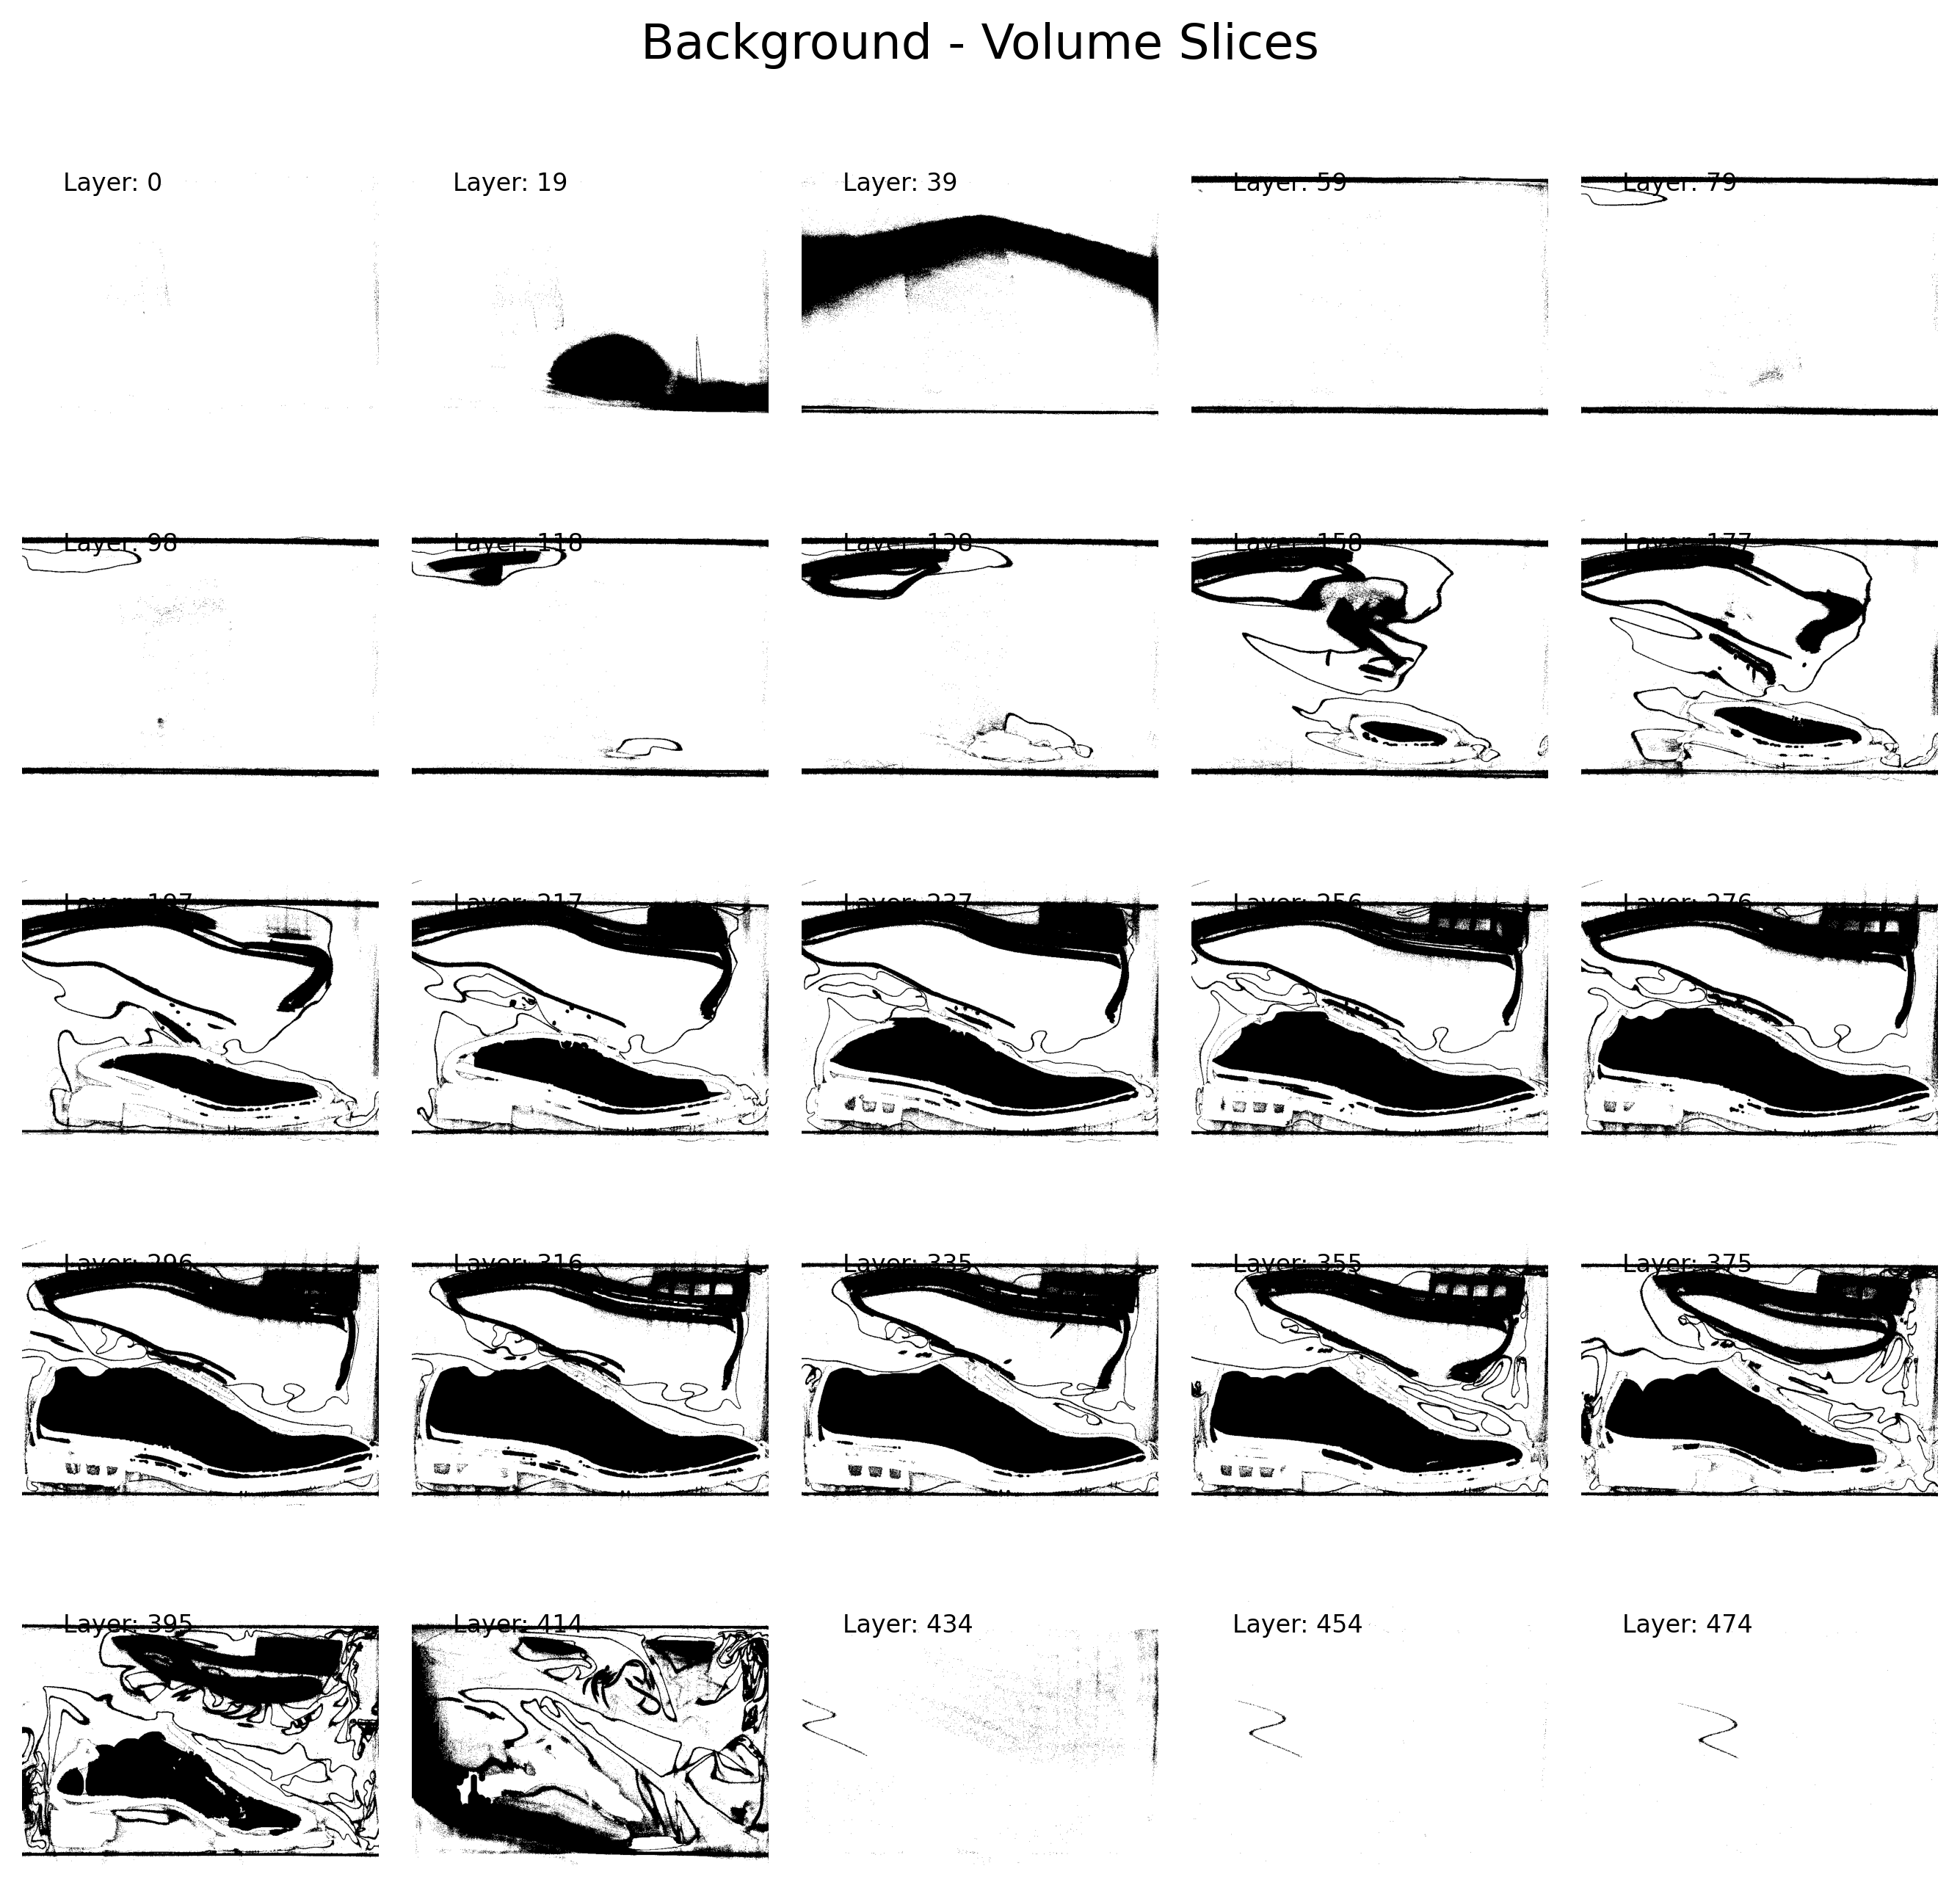

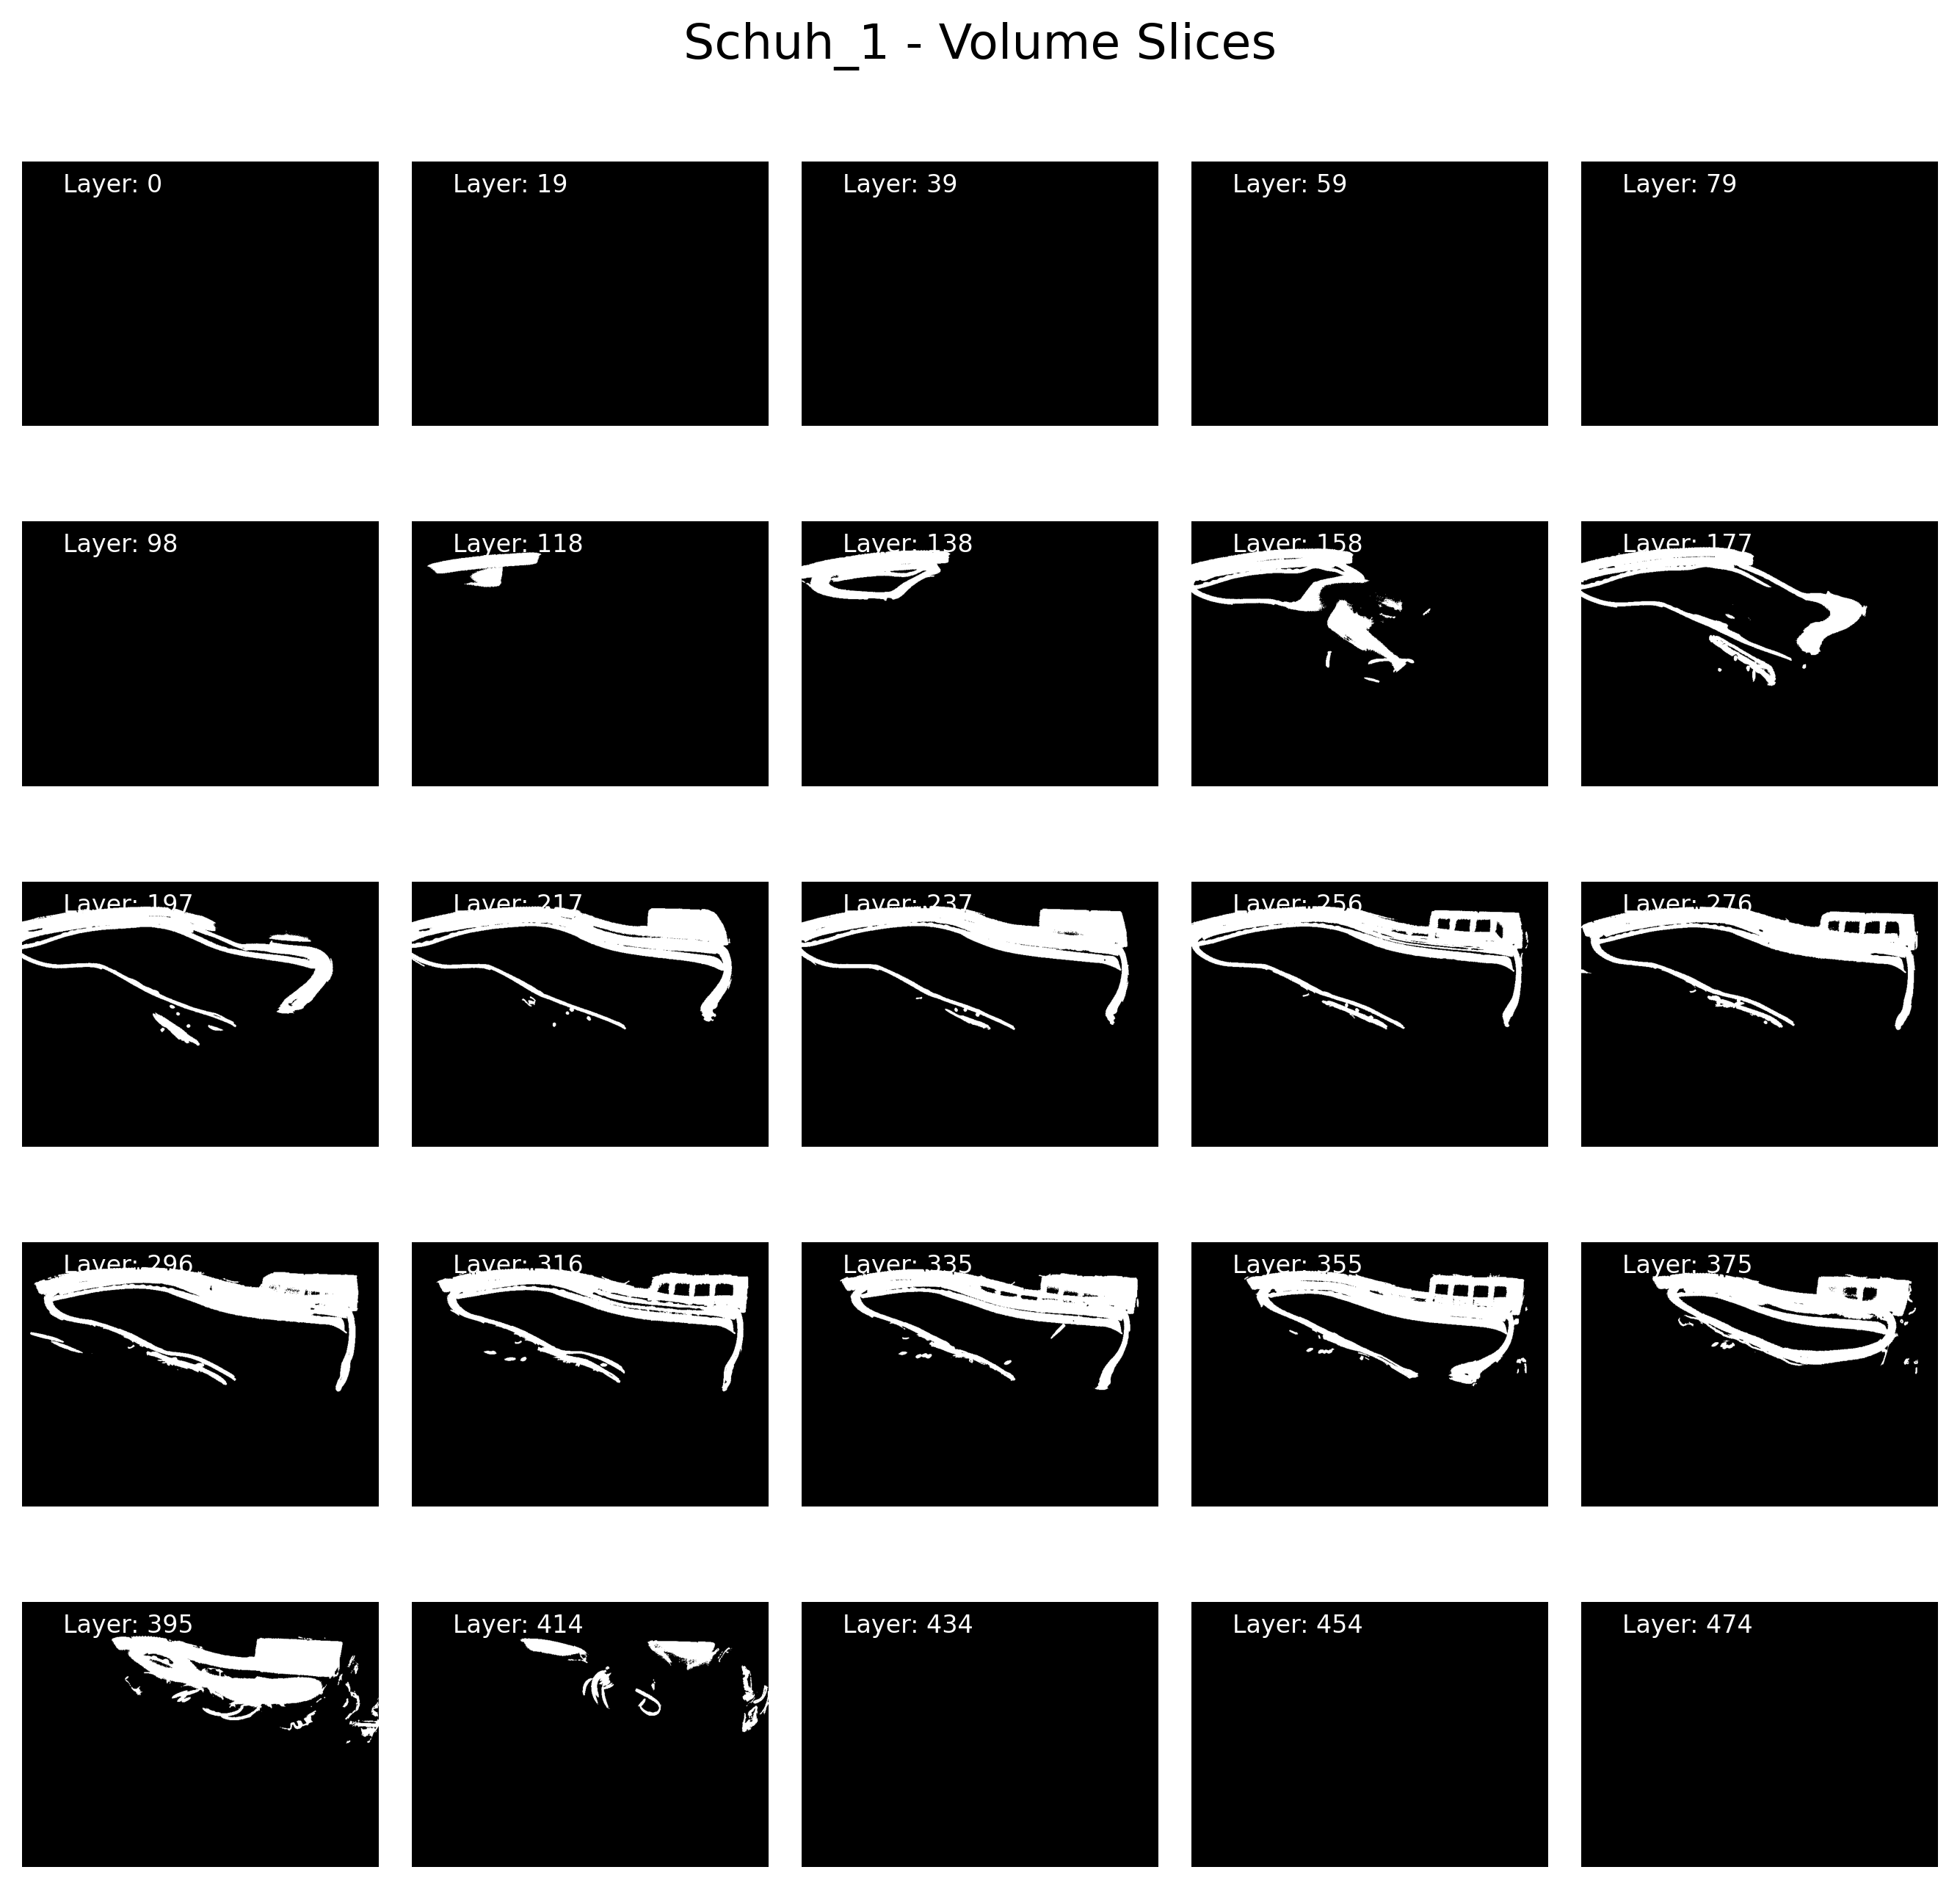

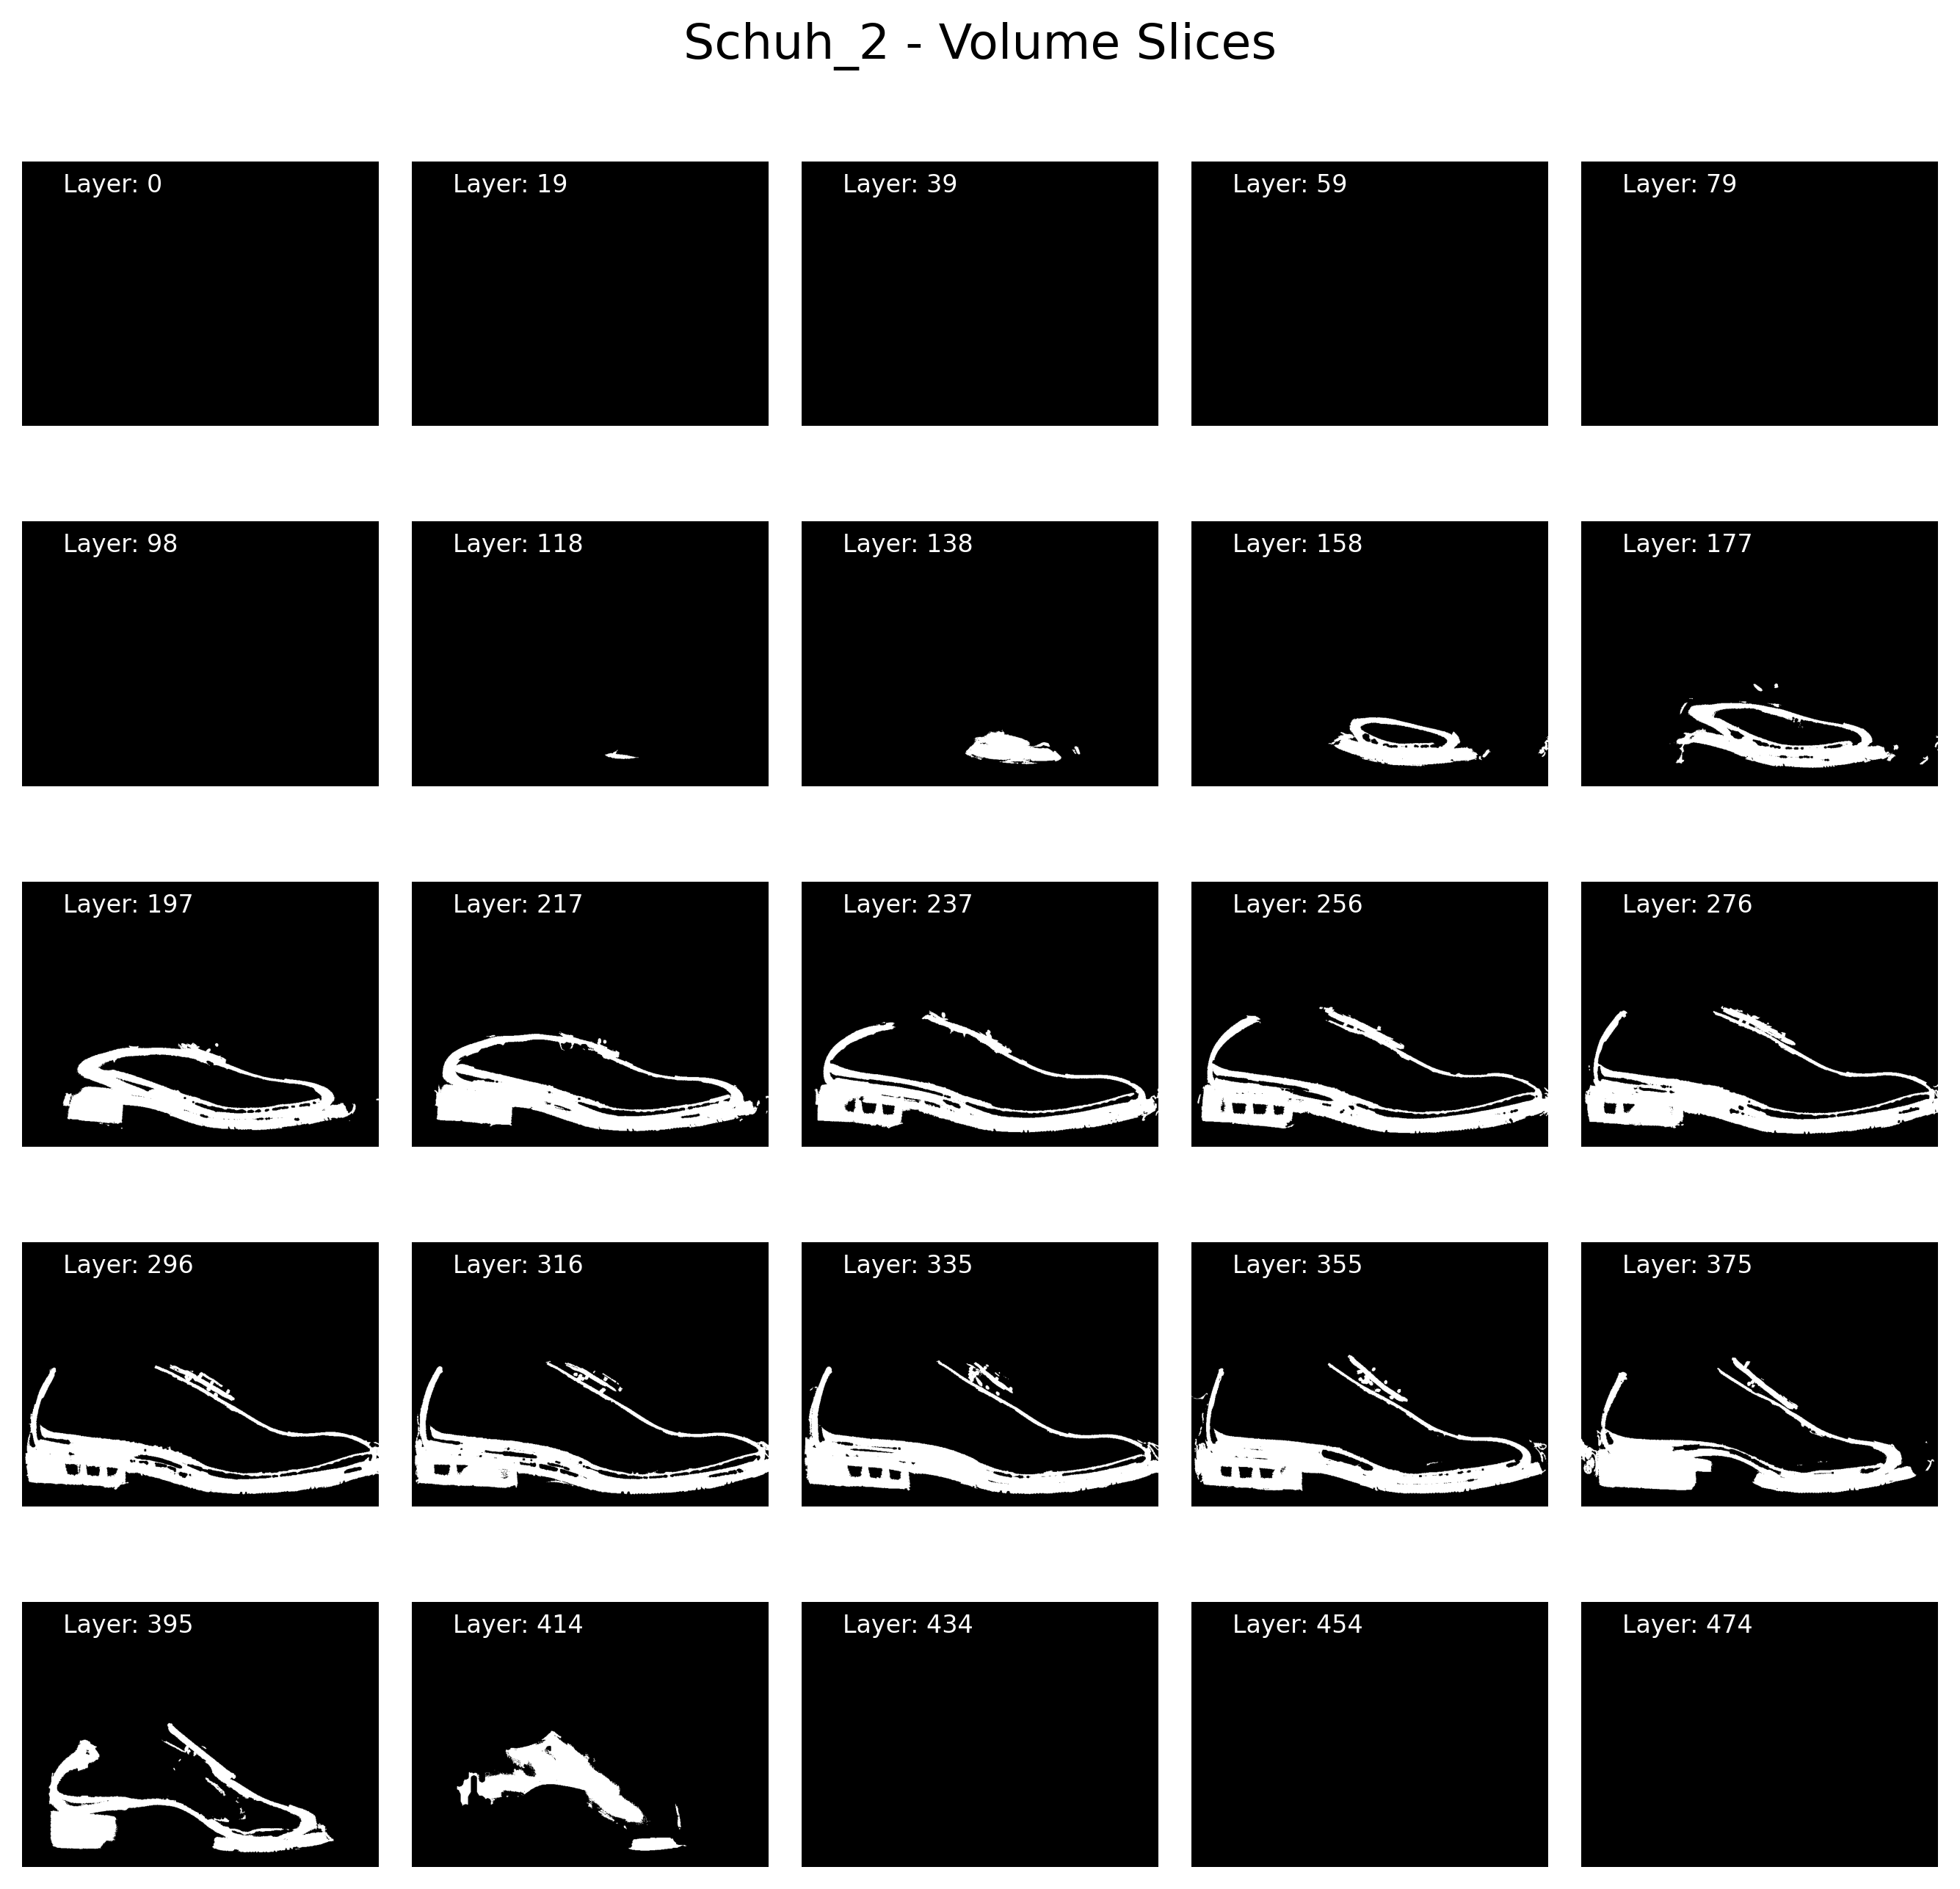

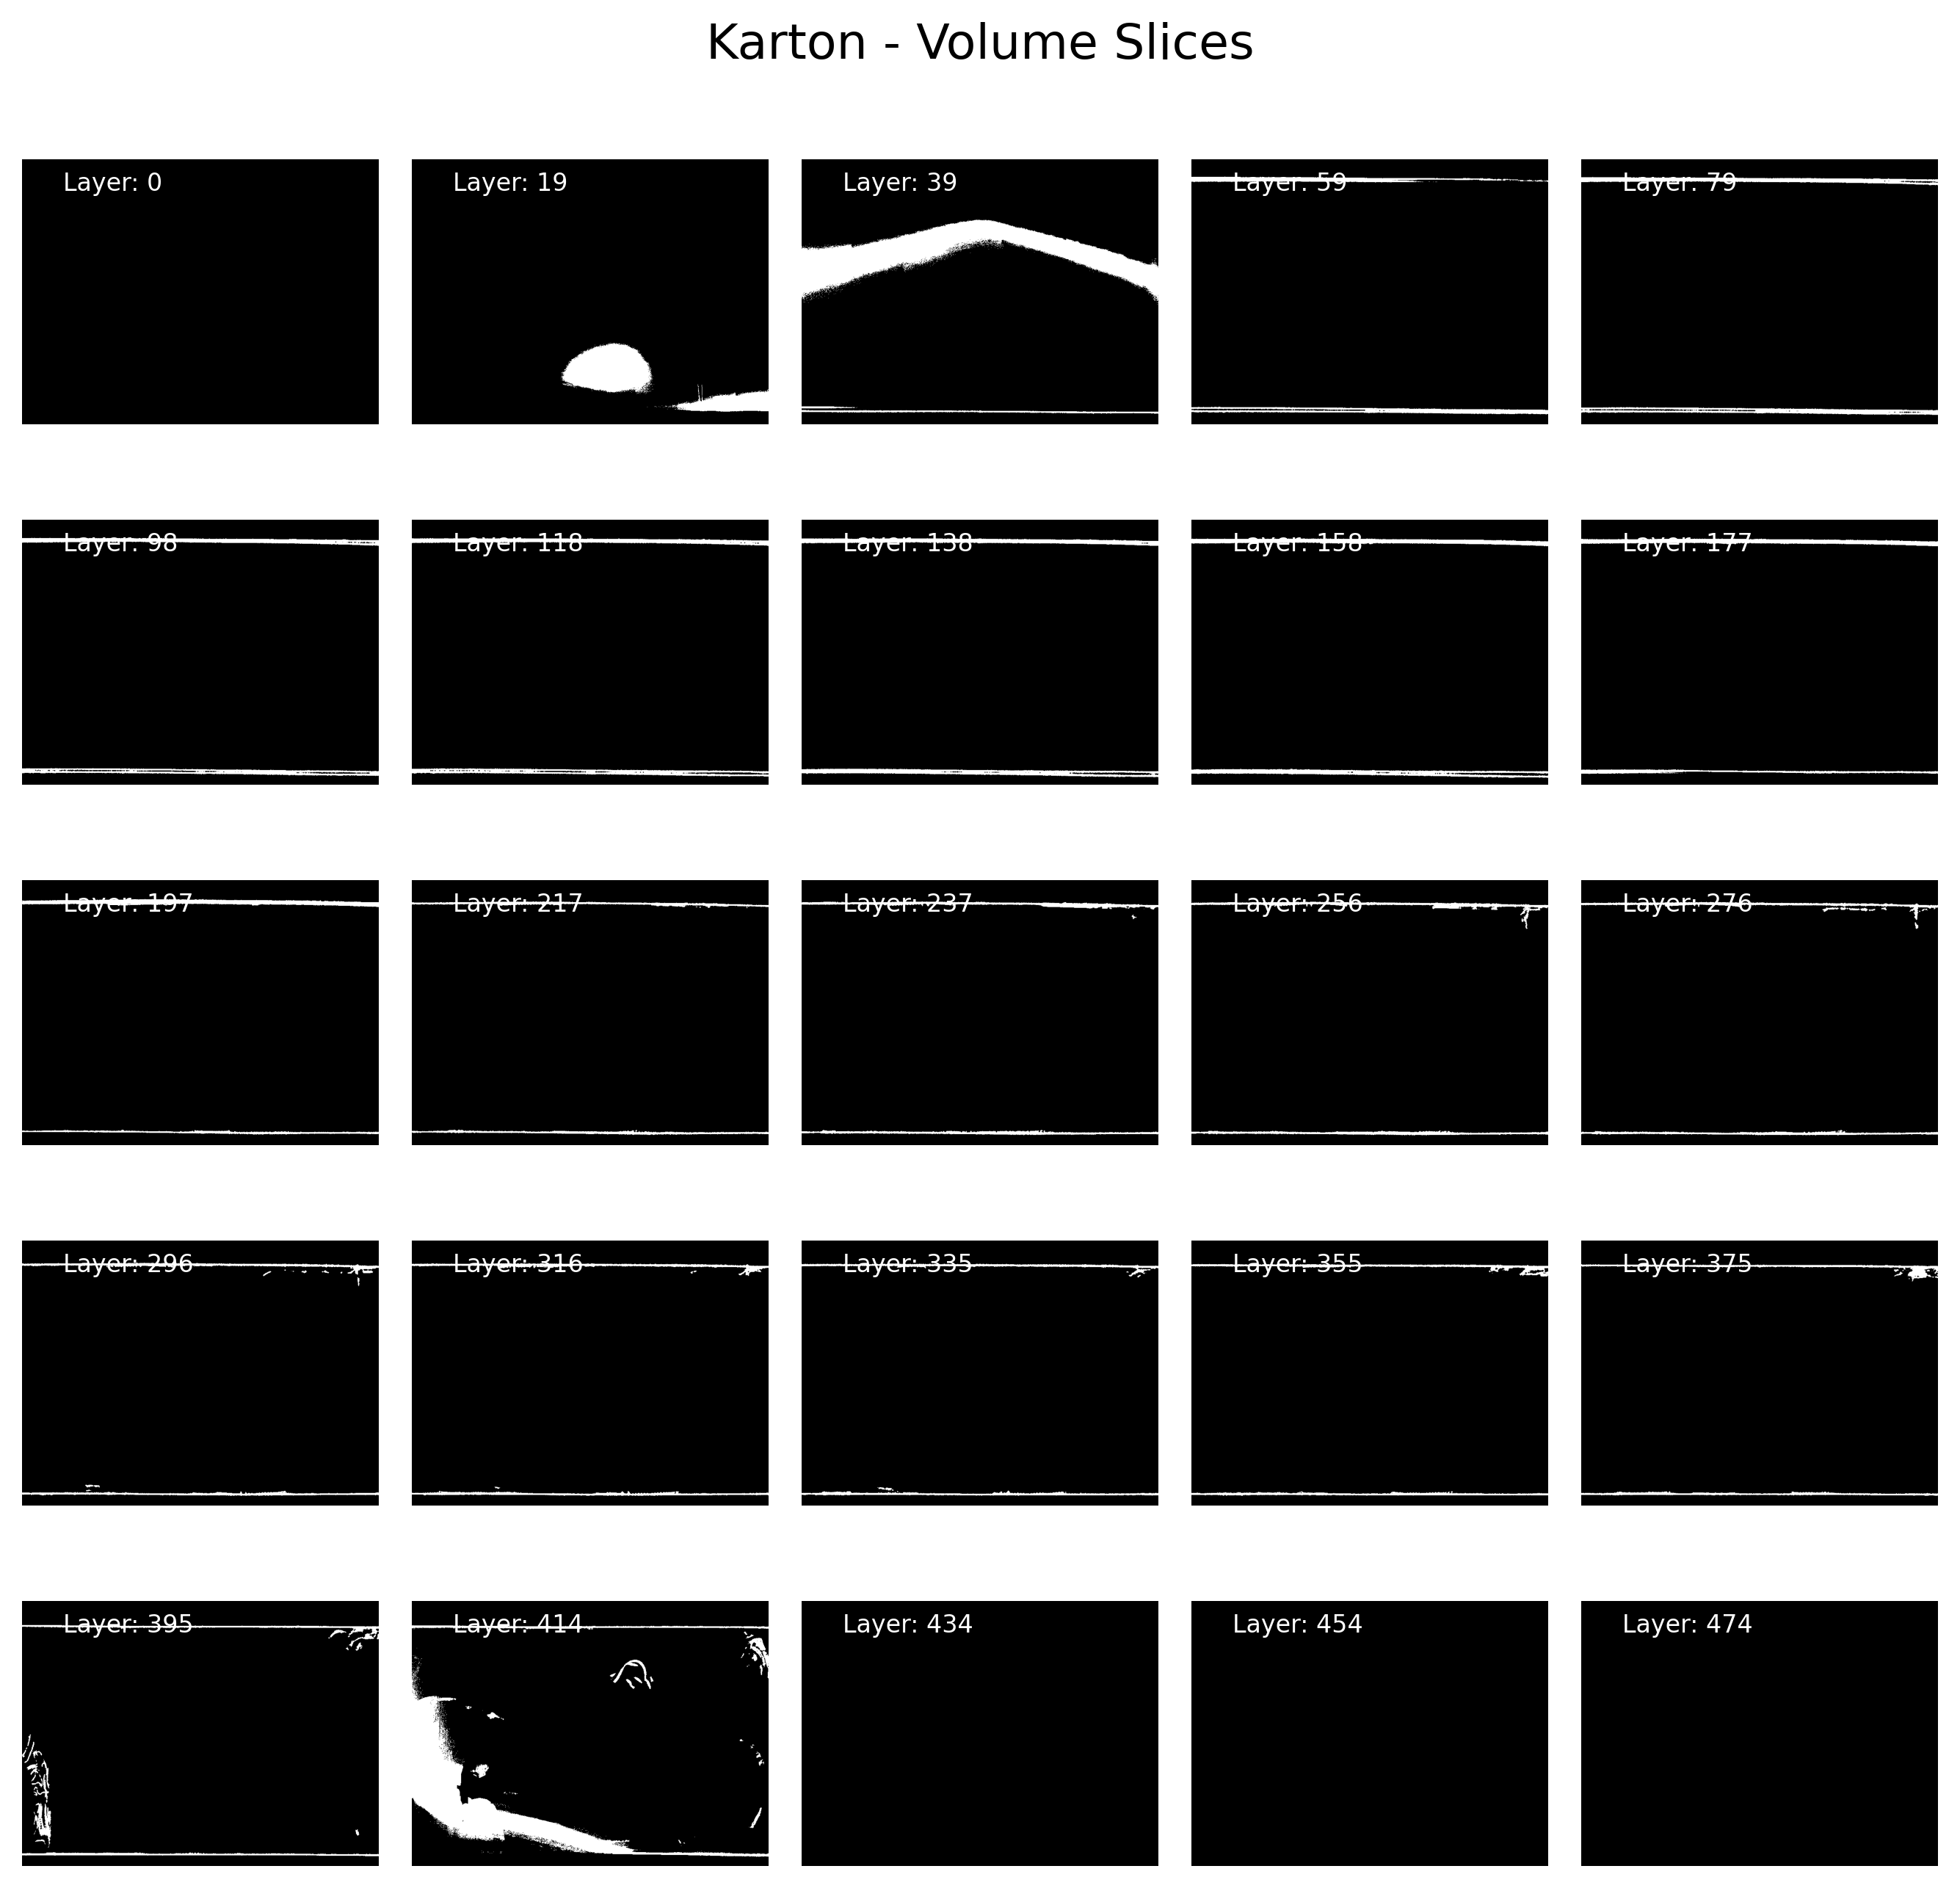

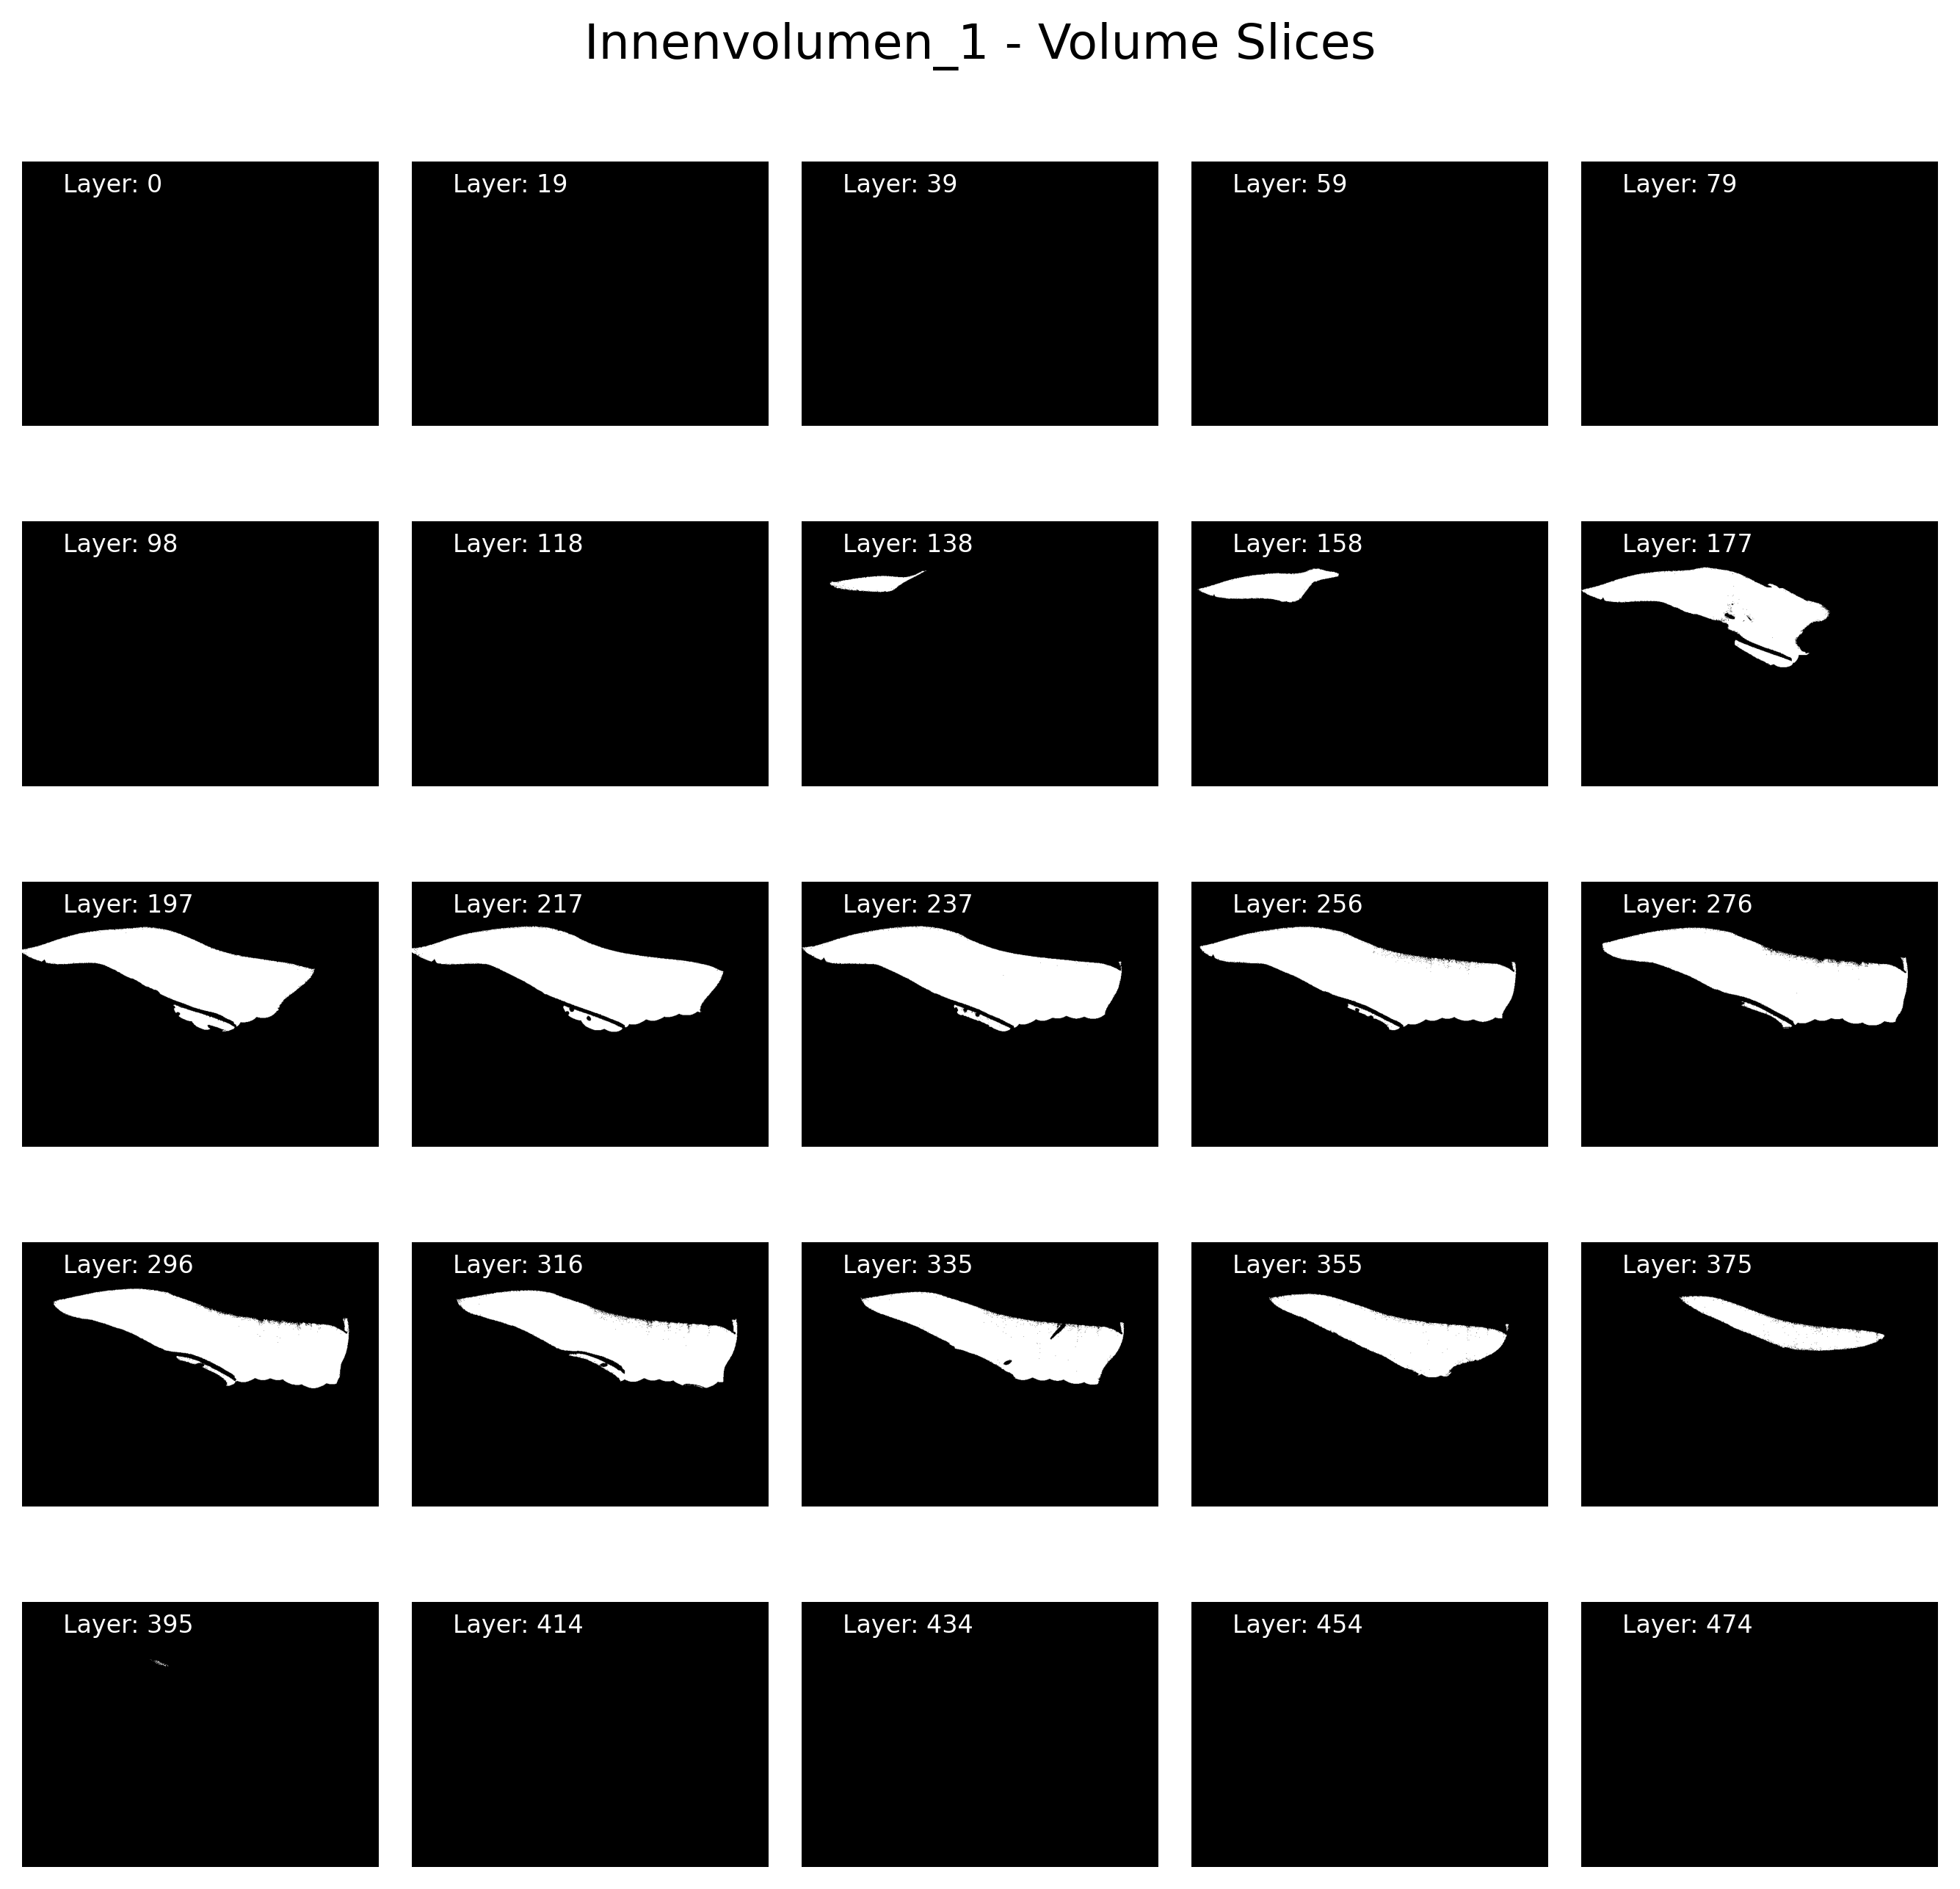

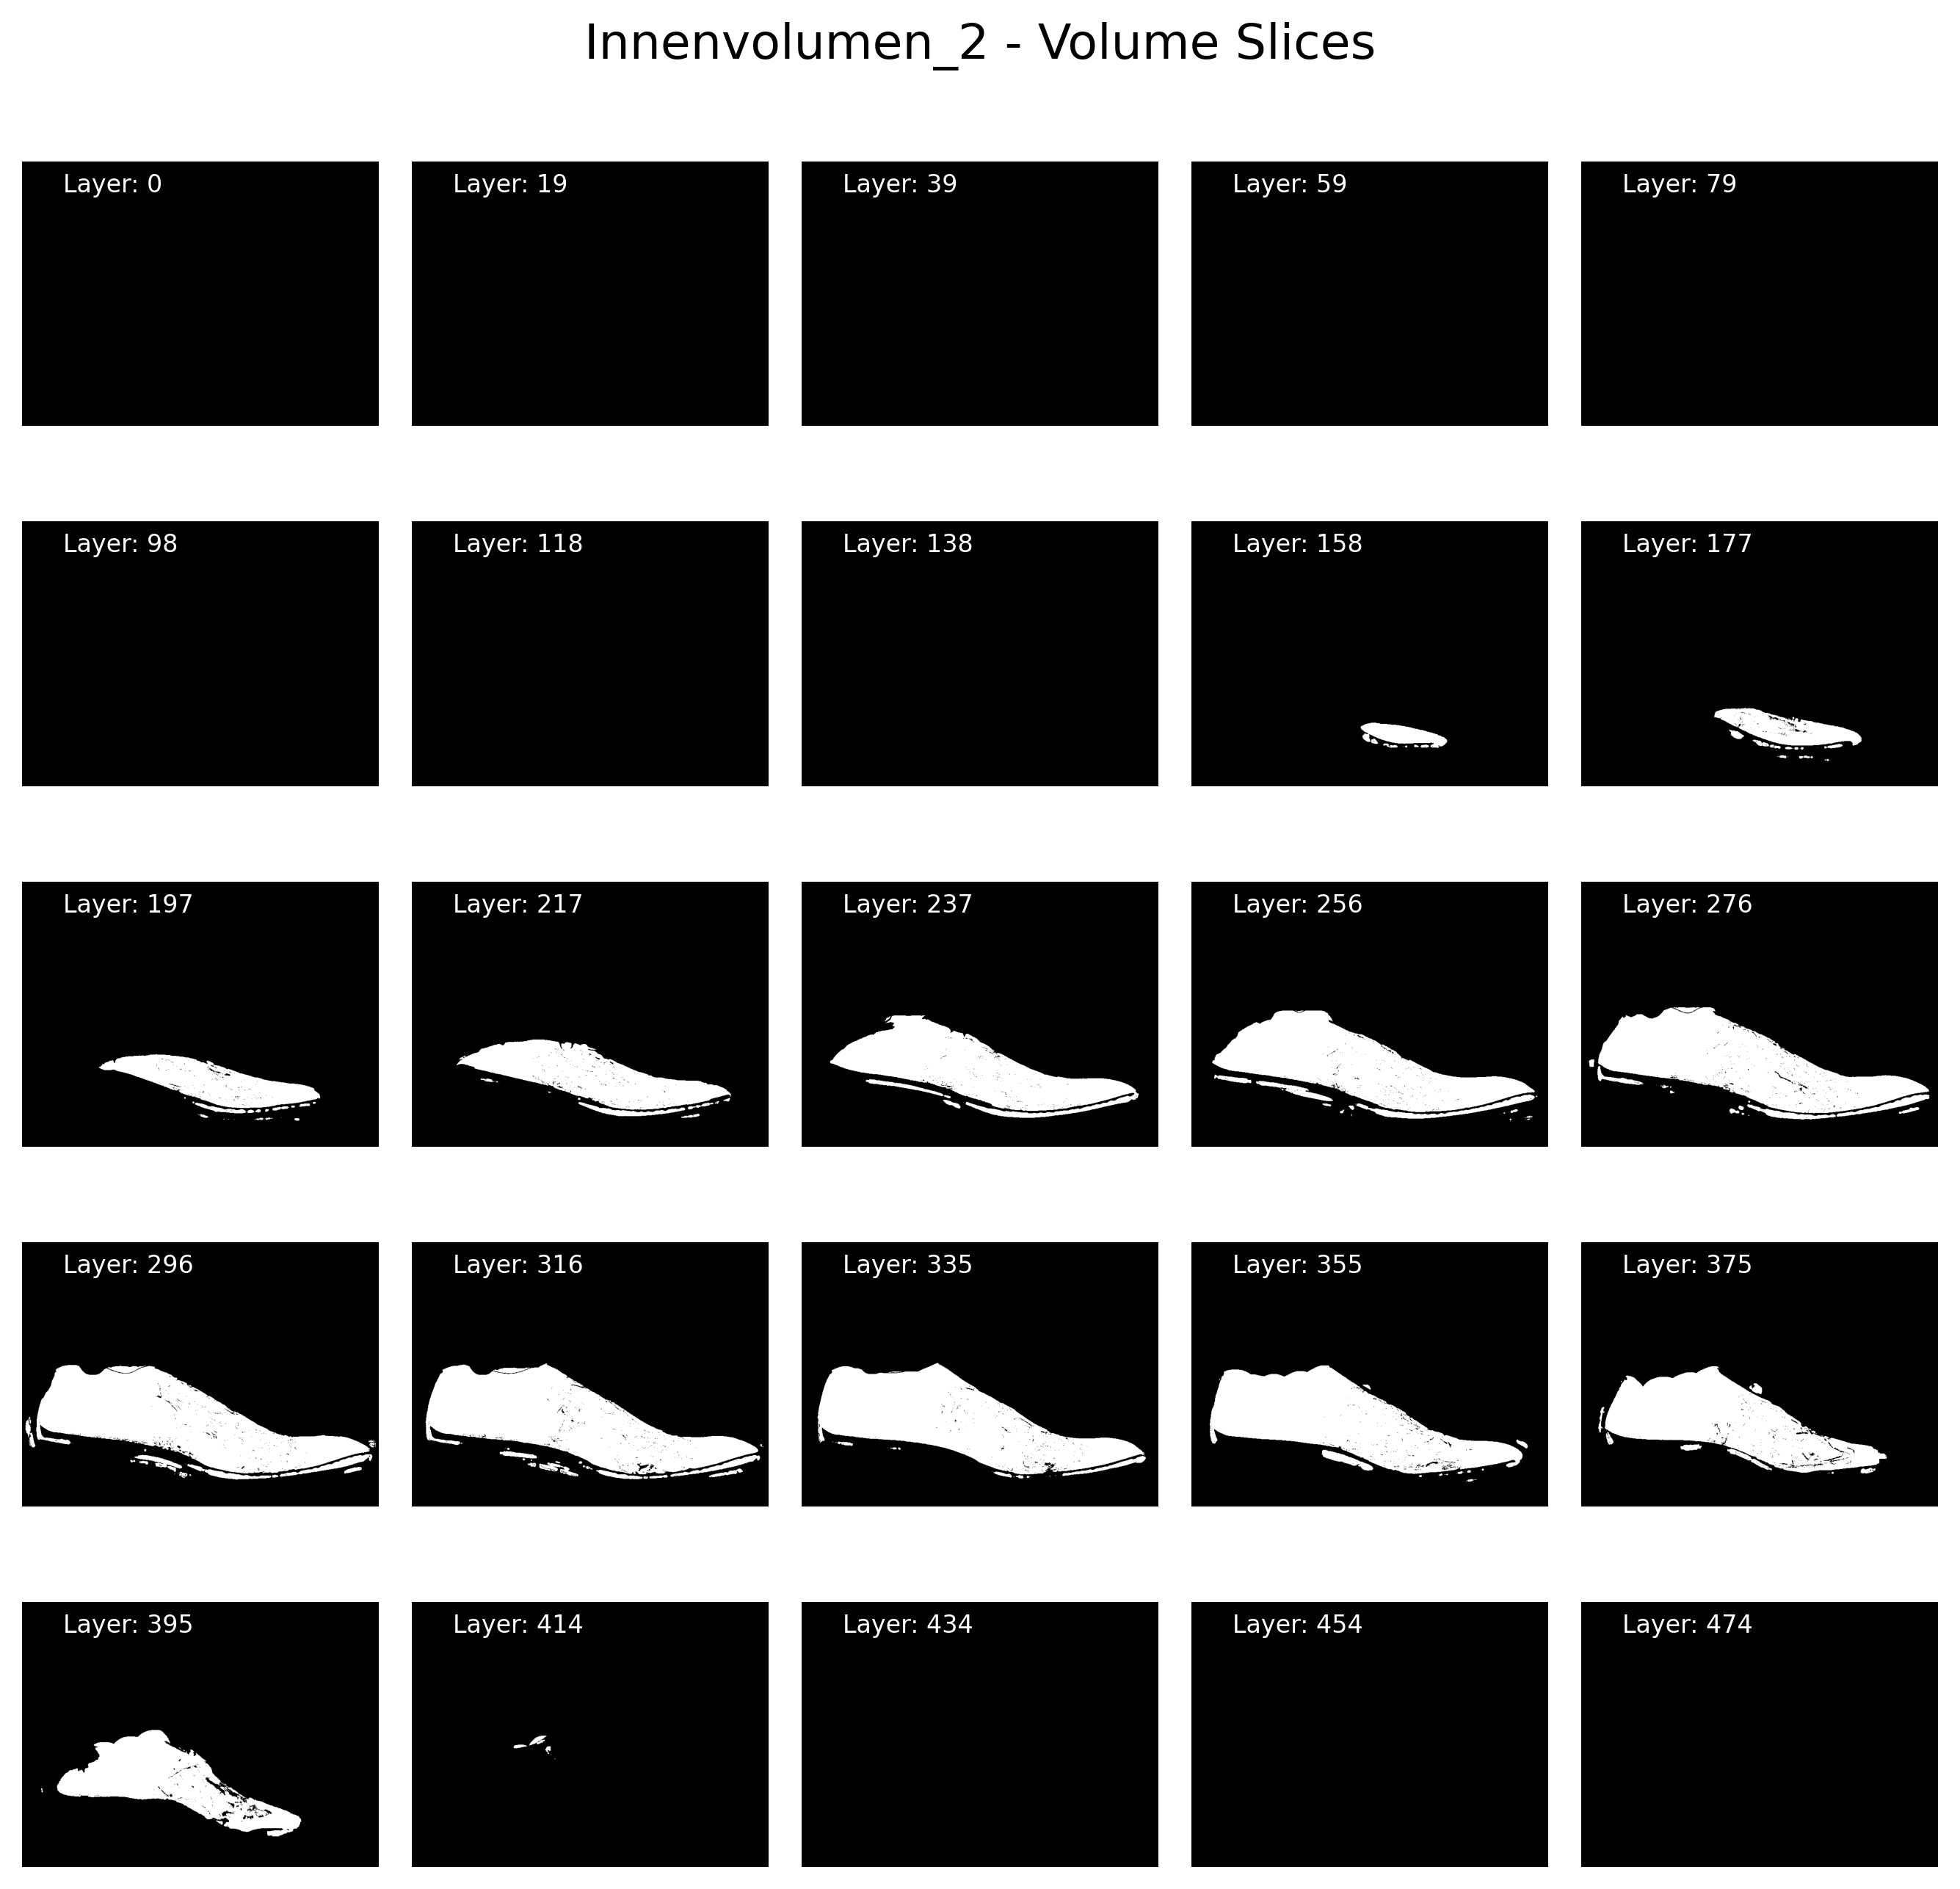

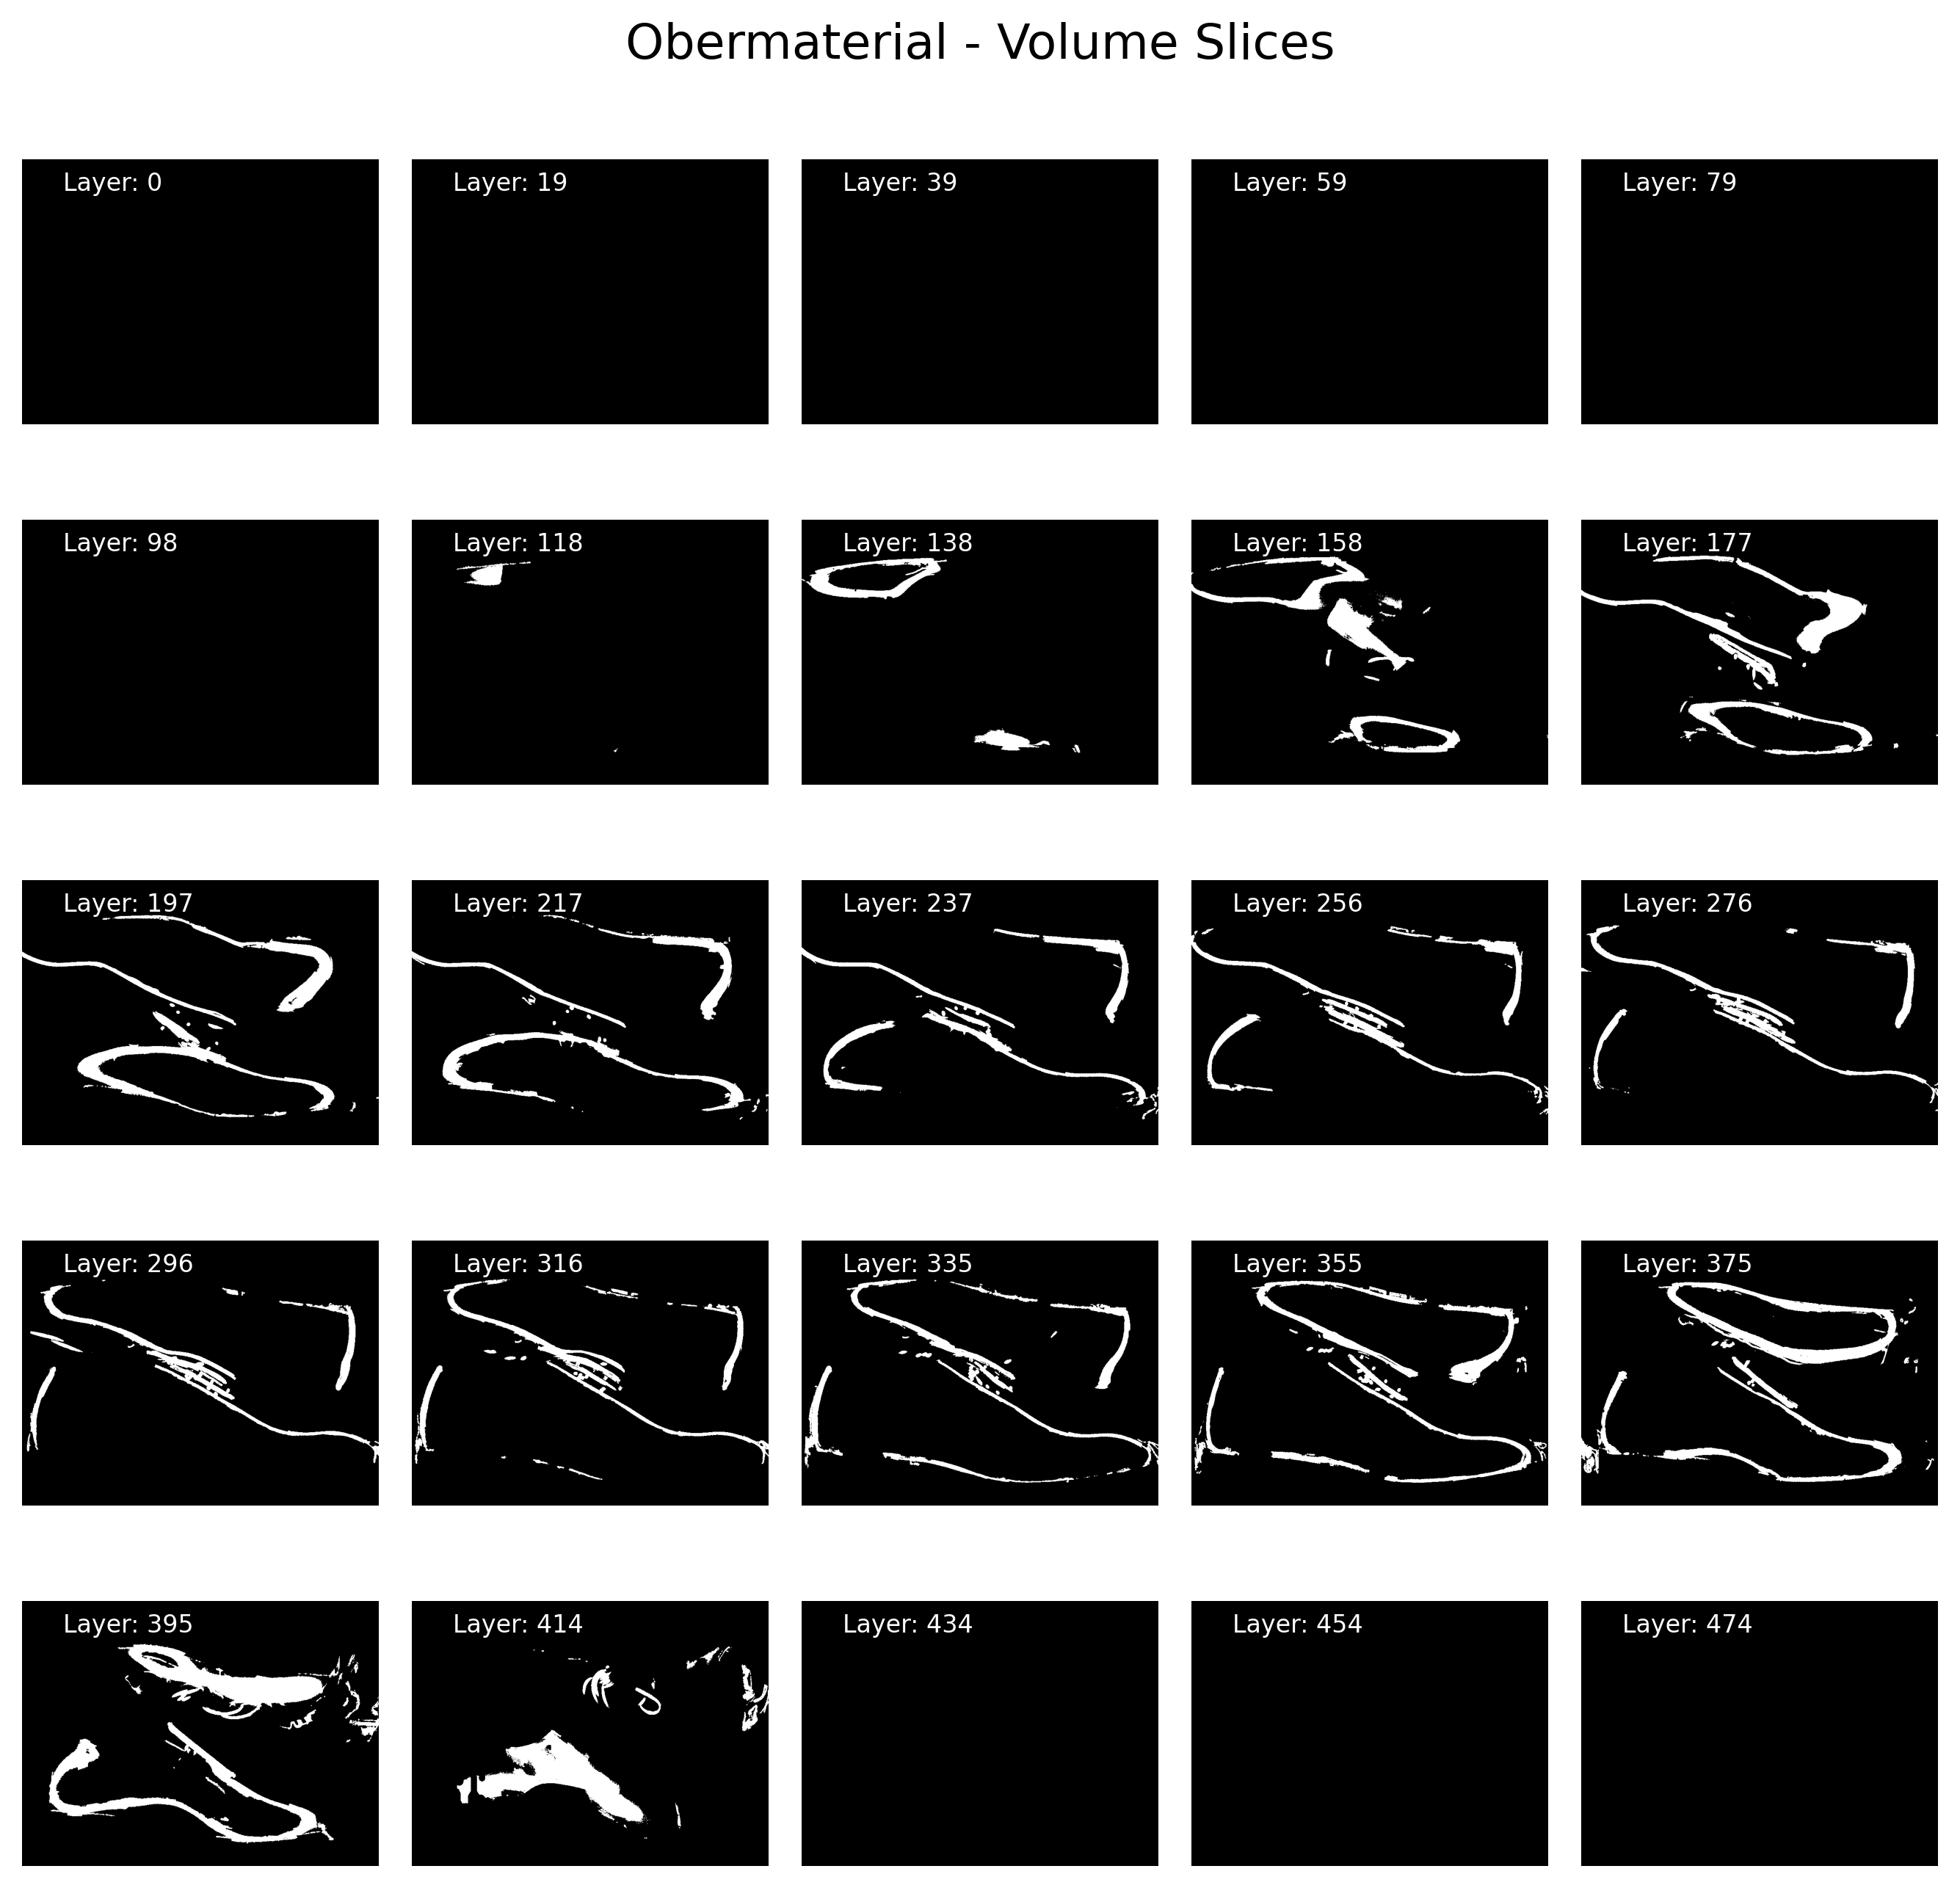

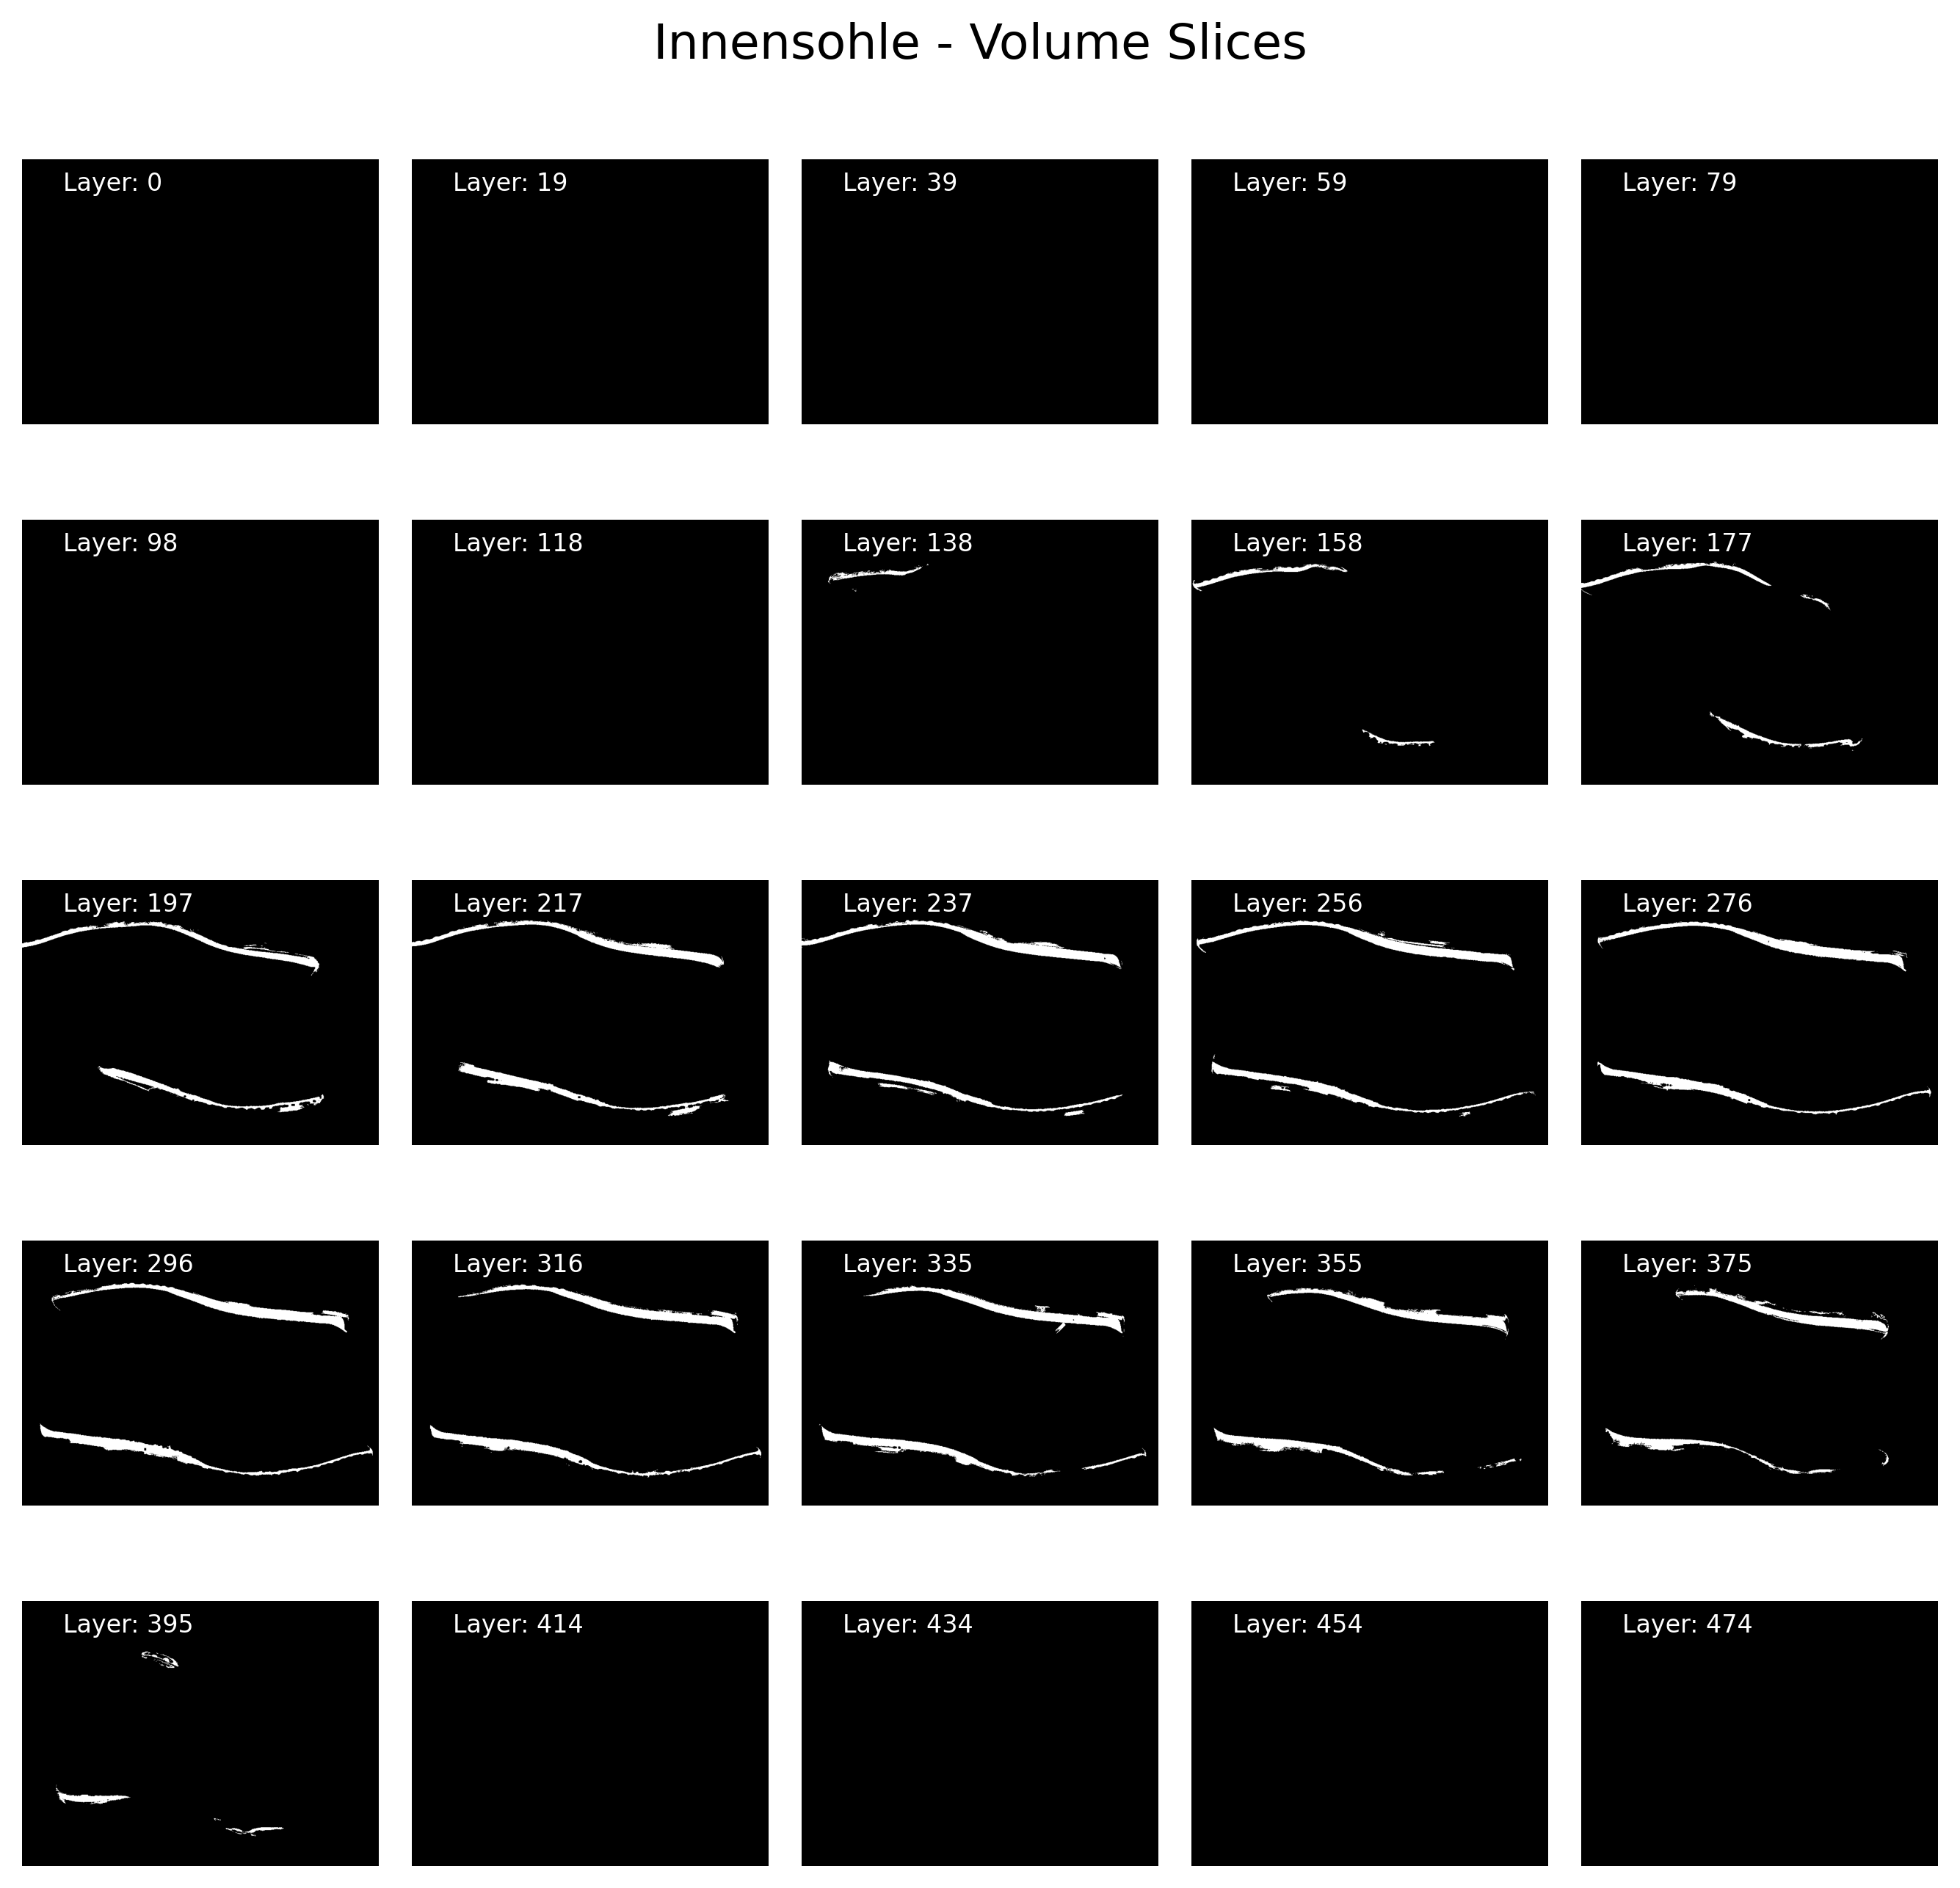

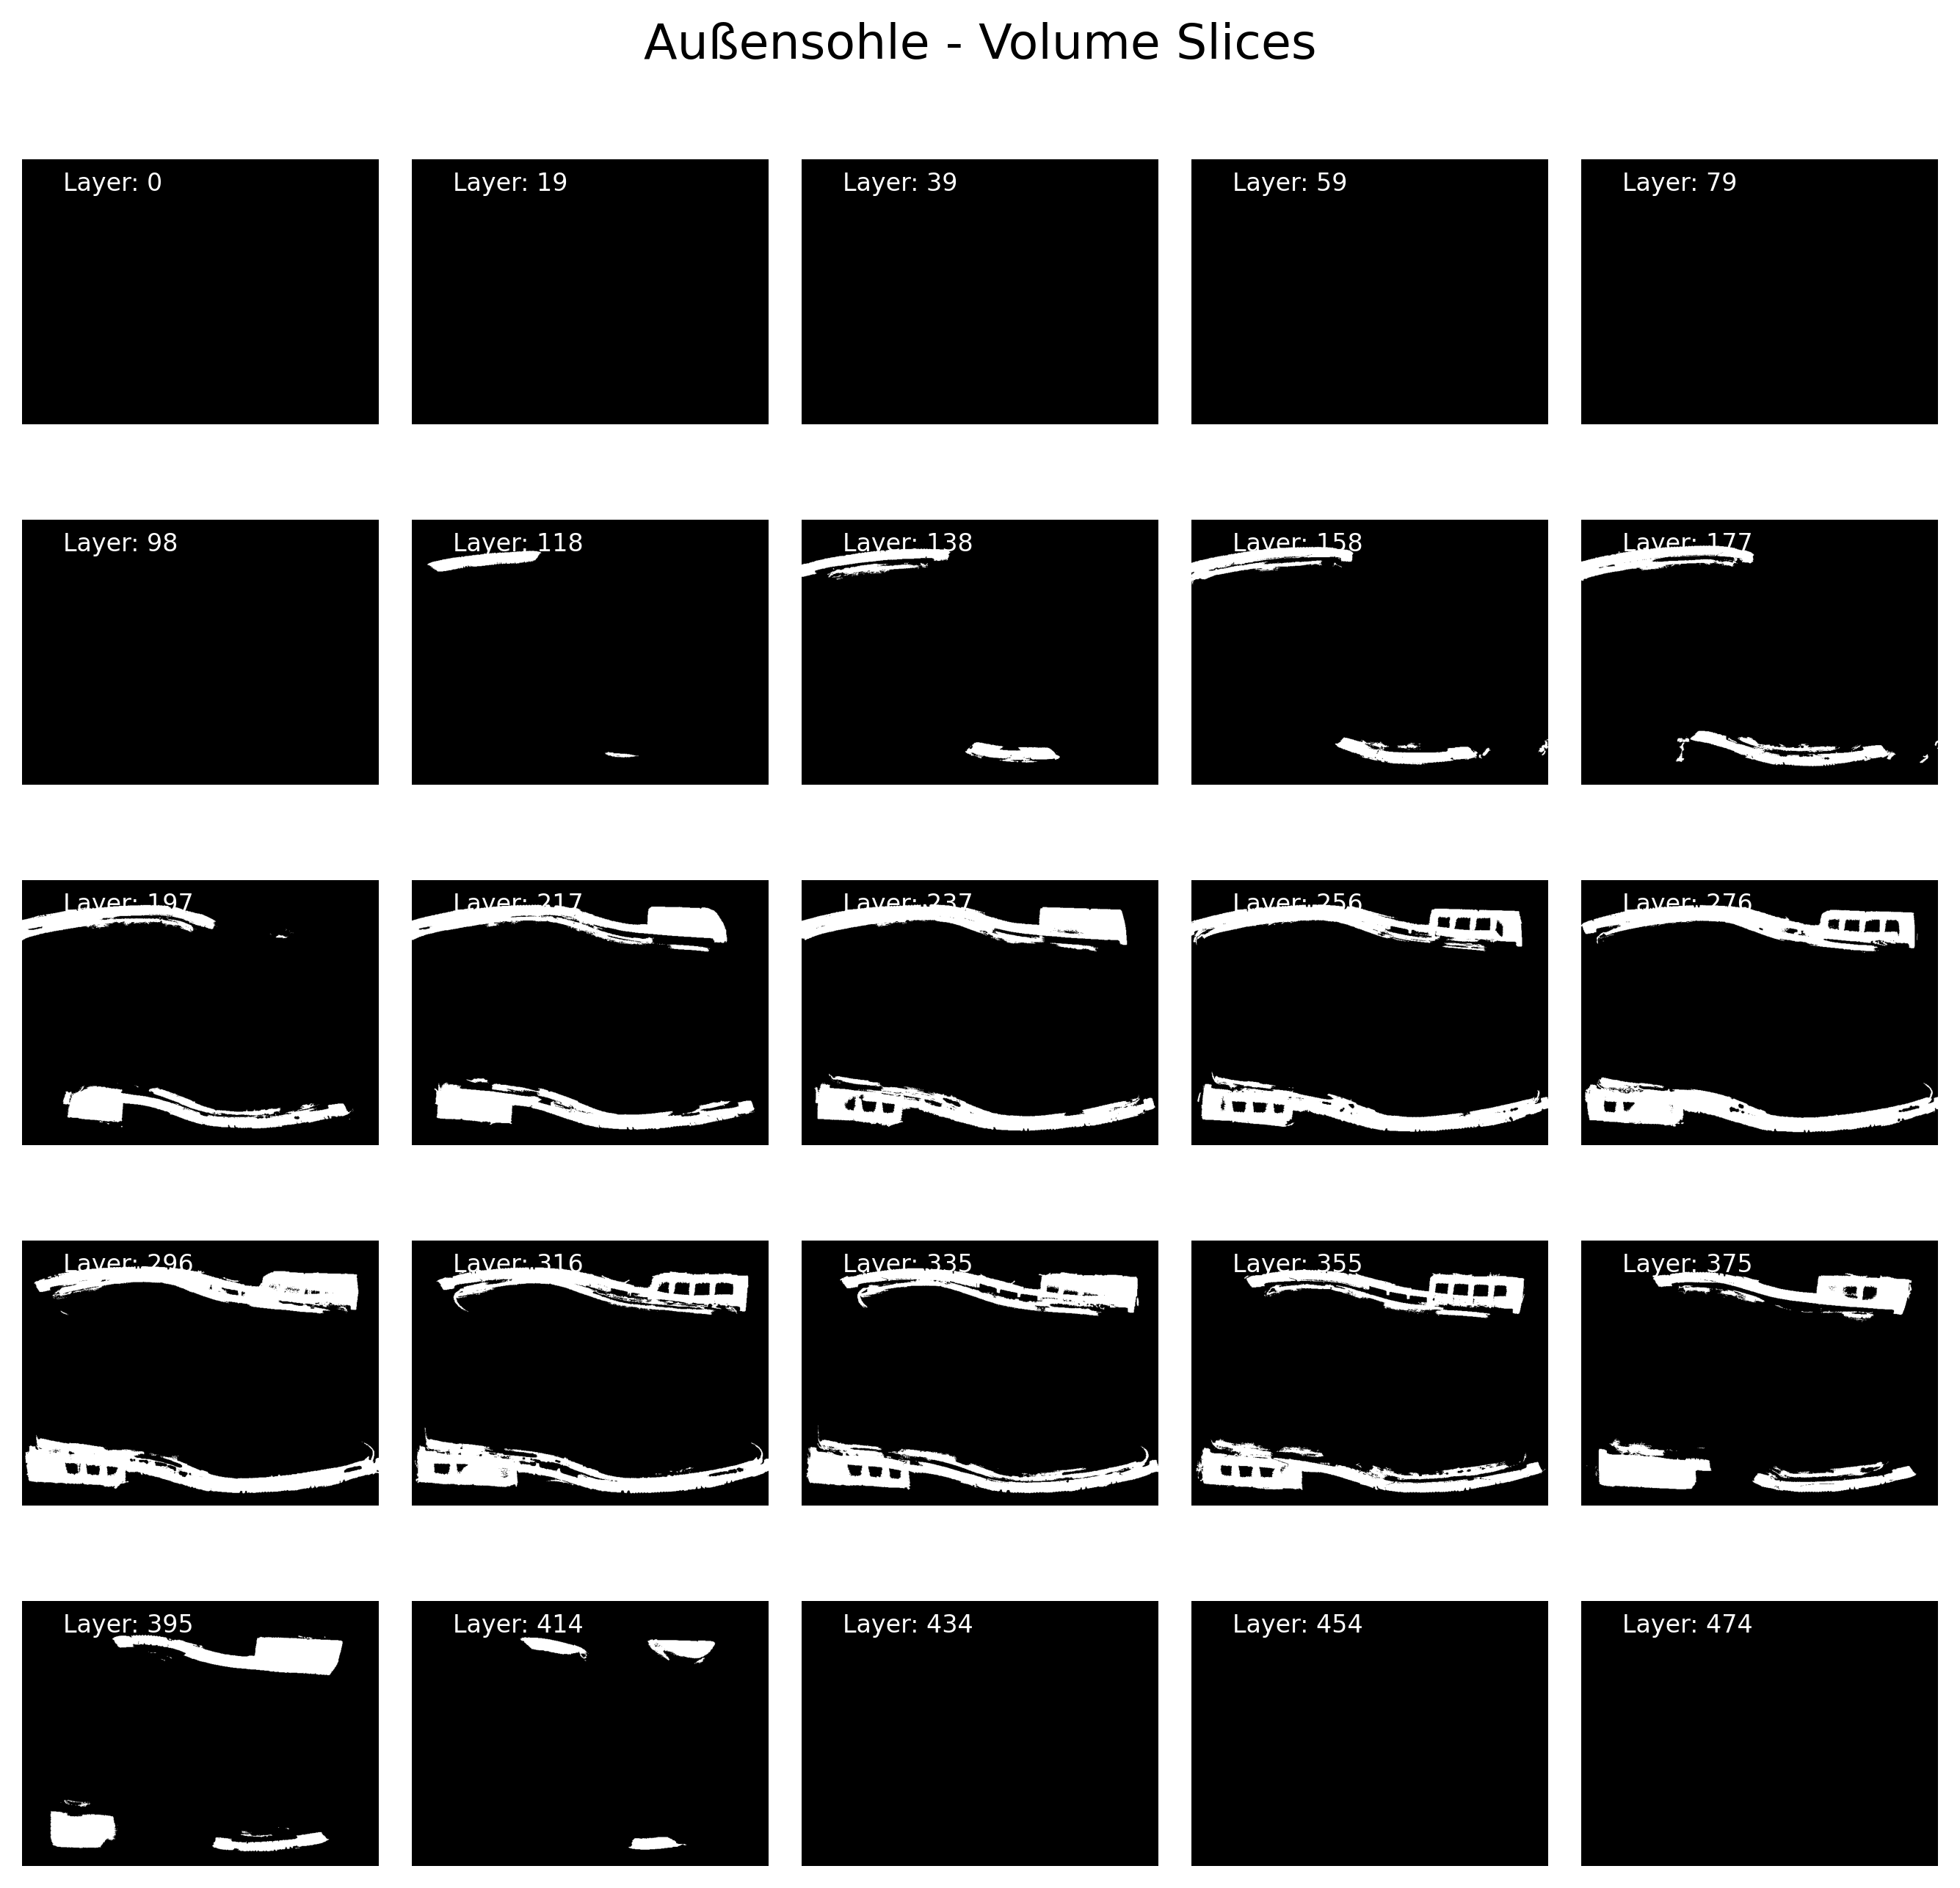

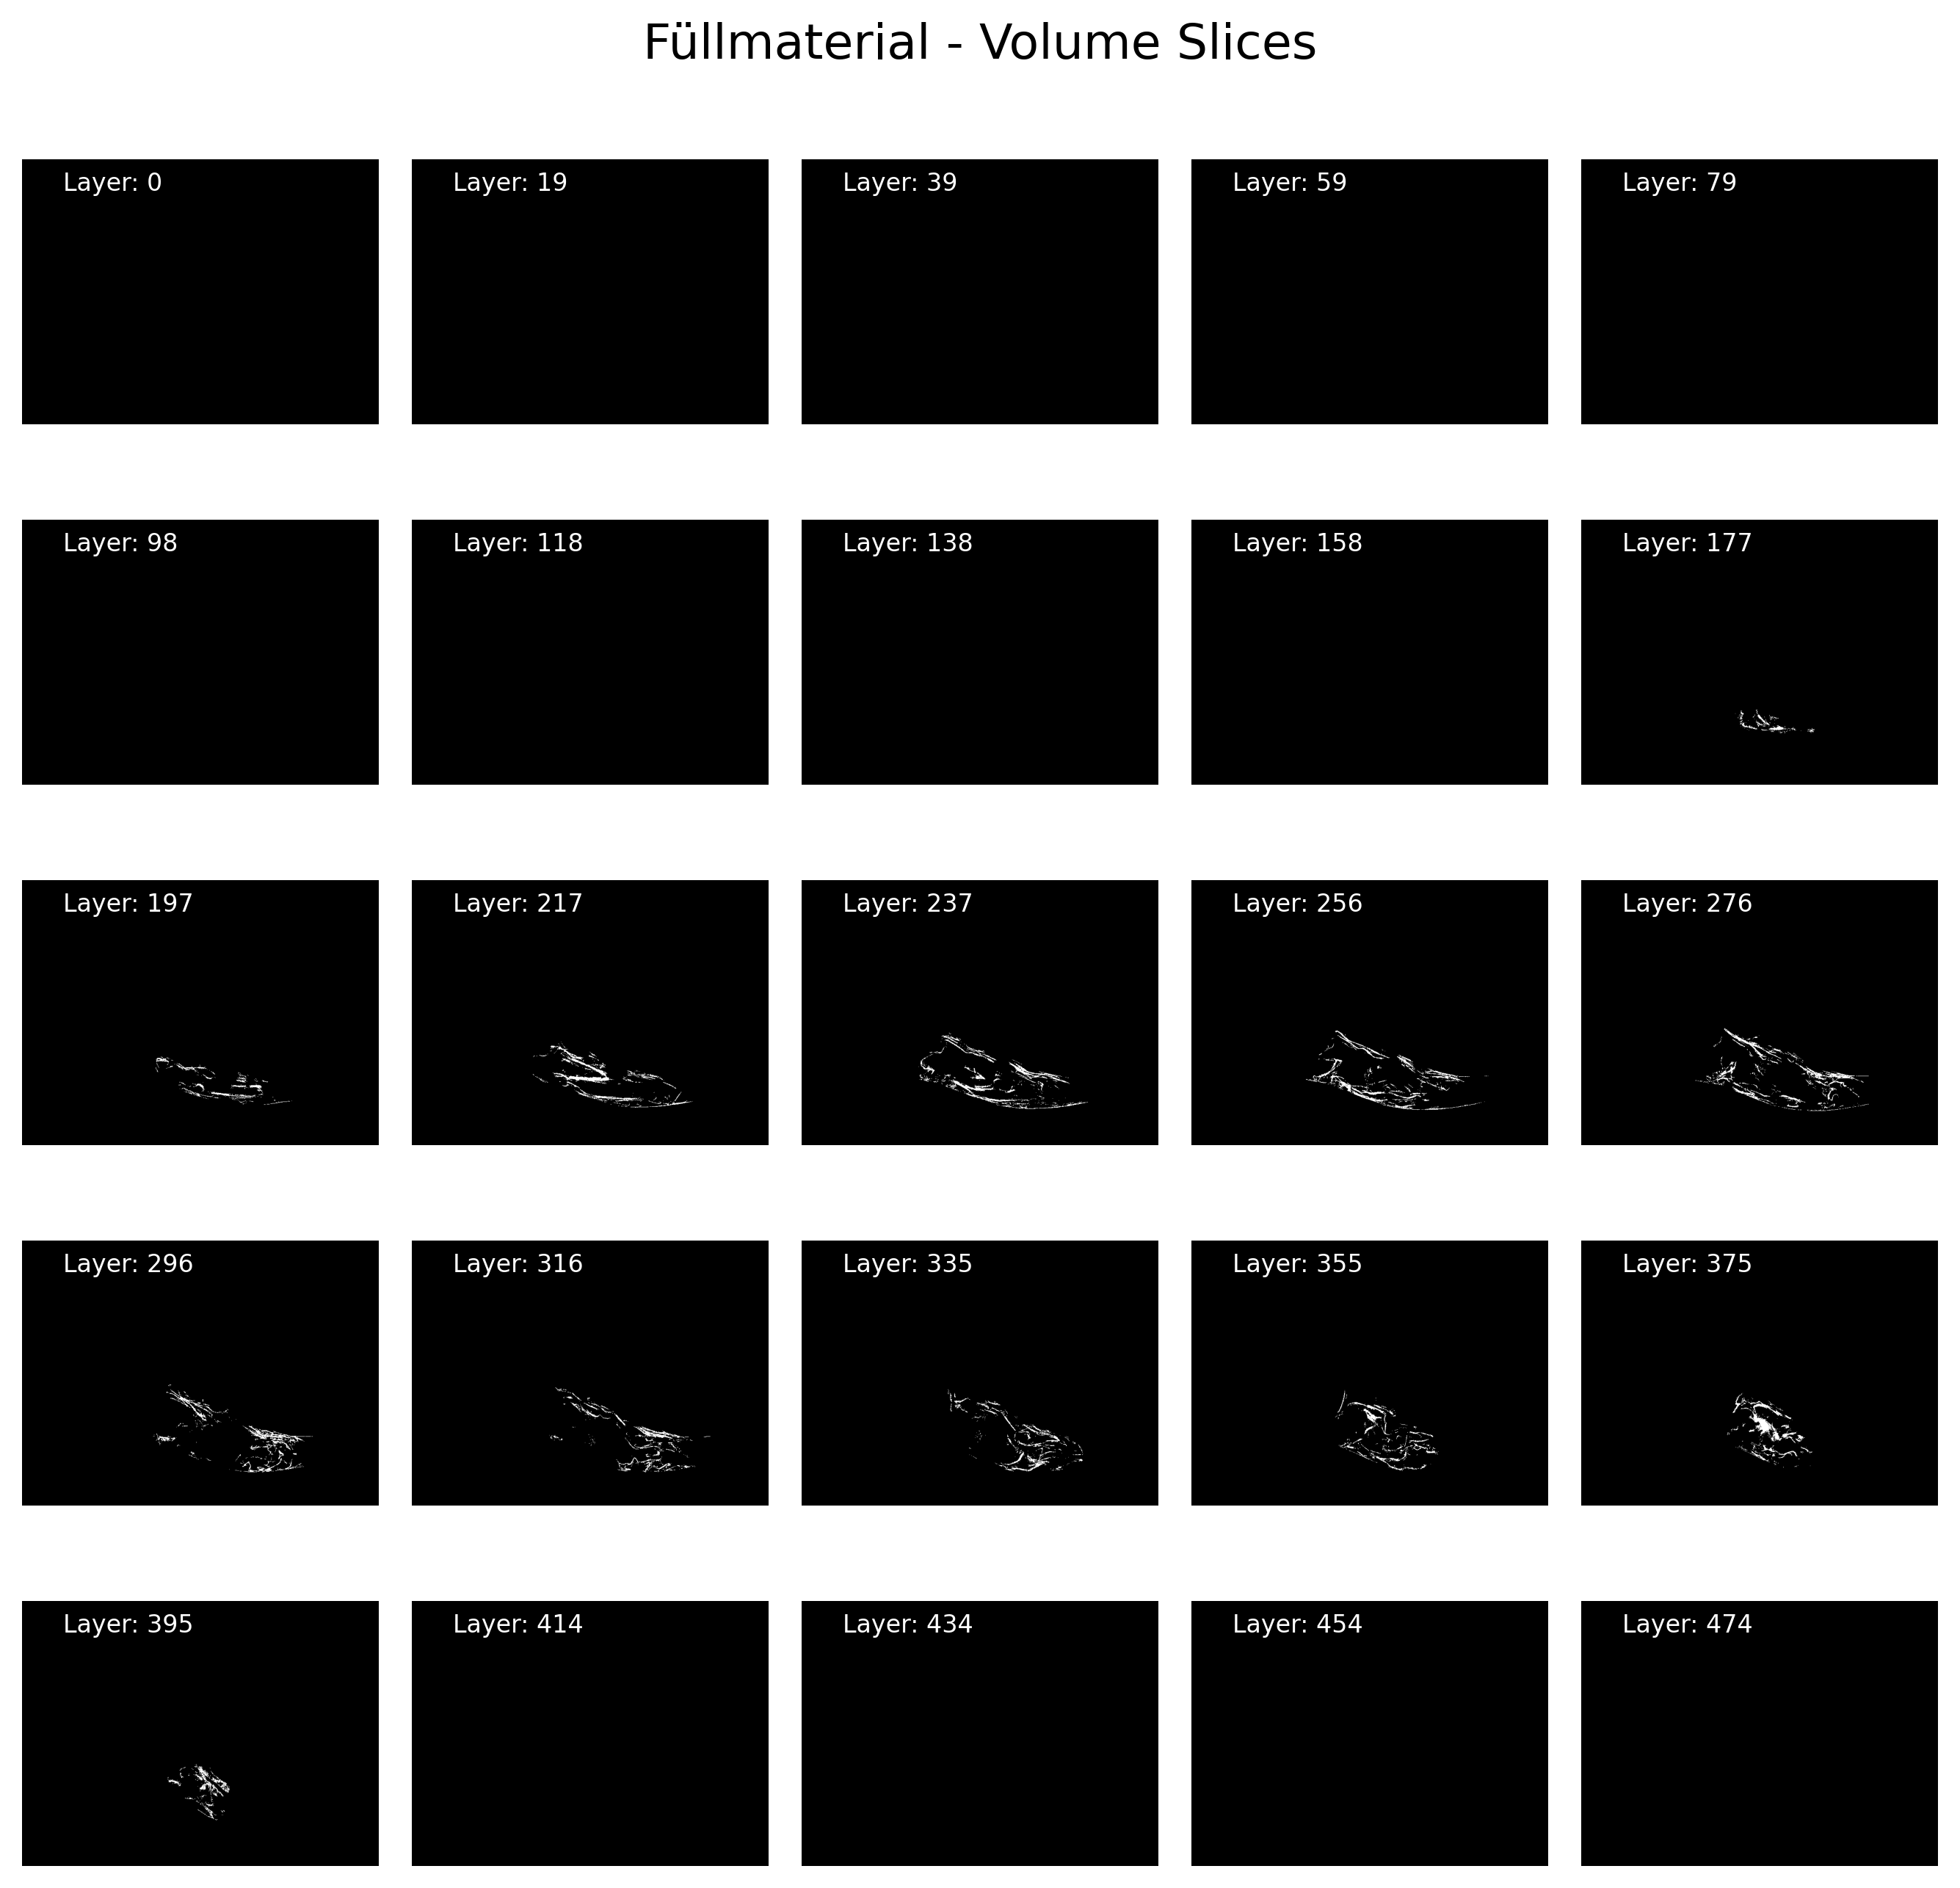

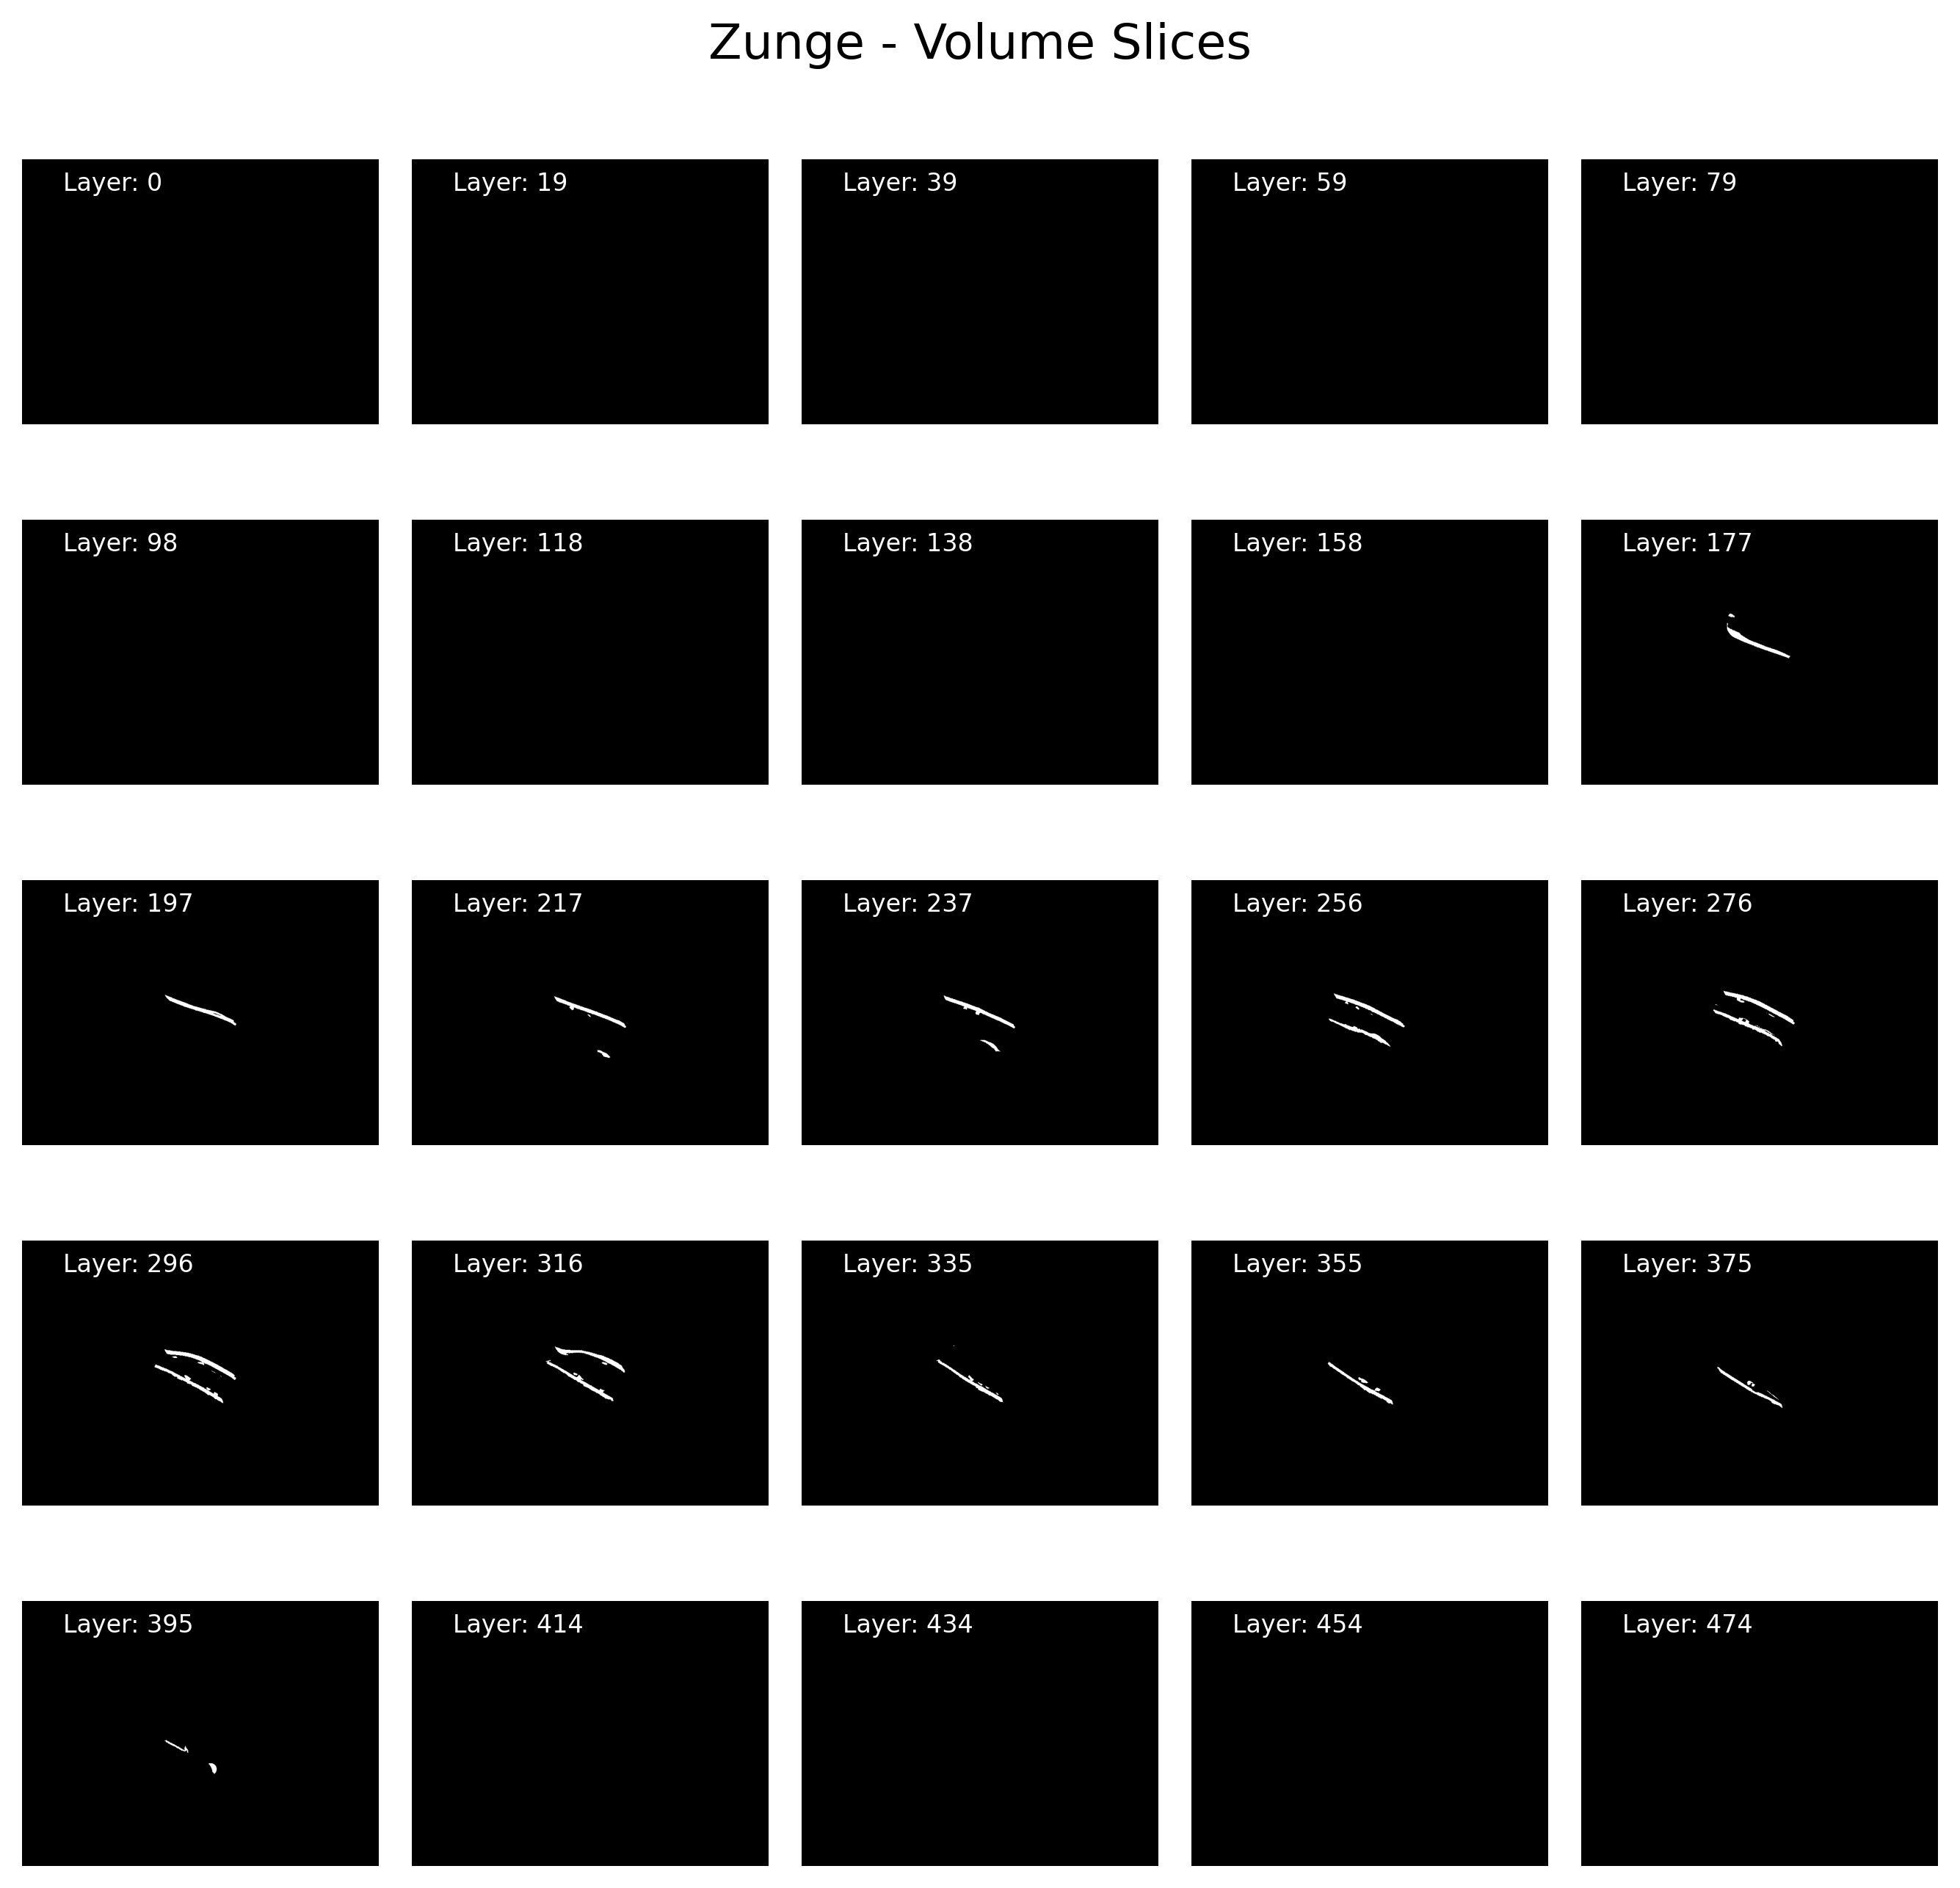

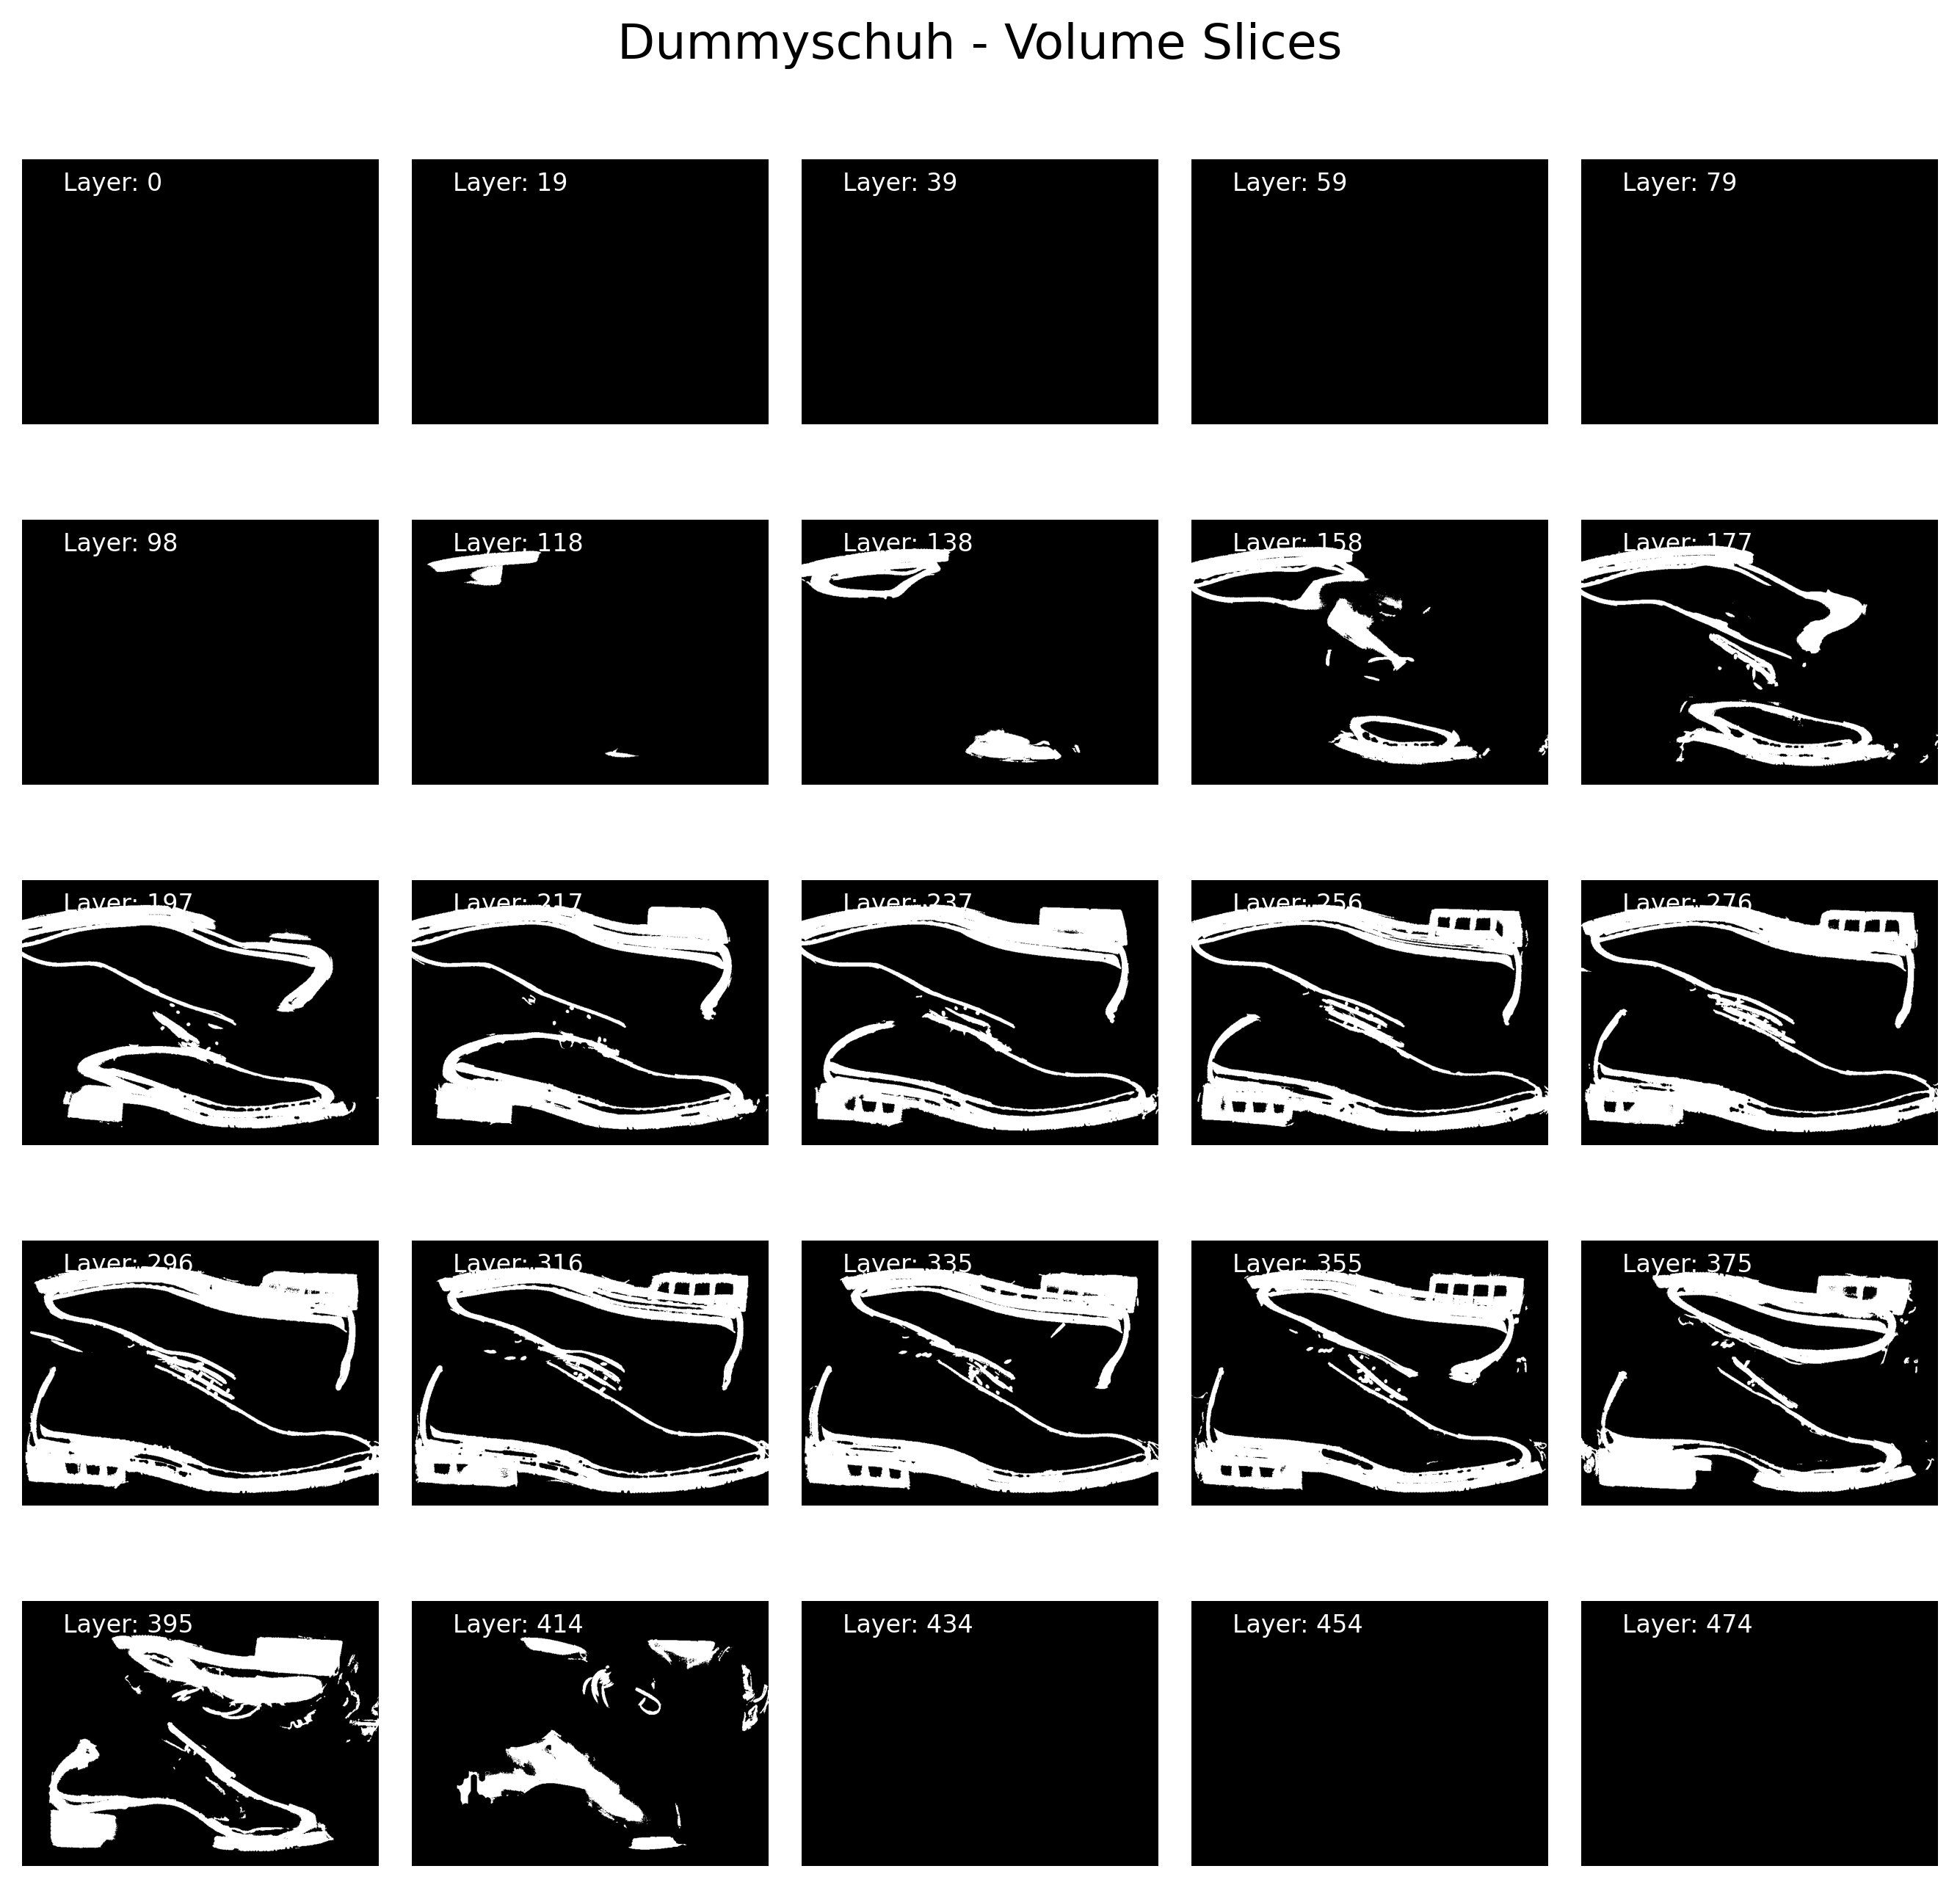

In [14]:
target_directory = "./images/masks_Bruschi_down2_2_2_side_2D_25_layers_5x5"

orientation = (0,1,2)

plotPictures(target_directory, "Background", data_Background.get("voxels").transpose(orientation)*255/1)
plotPictures(target_directory, "Schuh_1", data_Schuh_1.get("voxels").transpose(orientation)*255/2)
plotPictures(target_directory, "Schuh_2", data_Schuh_2.get("voxels").transpose(orientation)*255/3)
plotPictures(target_directory, "Karton", data_Karton.get("voxels").transpose(orientation)*255/4)
plotPictures(target_directory, "Innenvolumen_1", data_Innenvolumen_1.get("voxels").transpose(orientation)*255/5)
plotPictures(target_directory, "Innenvolumen_2", data_Innenvolumen_2.get("voxels").transpose(orientation)*255/6)
plotPictures(target_directory, "Obermaterial", data_Obermaterial.get("voxels").transpose(orientation)*255/7)
plotPictures(target_directory, "Innensohle", data_Innensohle.get("voxels").transpose(orientation)*255/8)
plotPictures(target_directory, "Außensohle", data_Aussensohle.get("voxels").transpose(orientation)*255/9)
plotPictures(target_directory, "Füllmaterial", data_Fuellmaterial.get("voxels").transpose(orientation)*255/10)
plotPictures(target_directory, "Zunge", data_Zunge.get("voxels").transpose(orientation)*255/11)
plotPictures(target_directory, "Dummyschuh", data_Dummyschuh.get("voxels").transpose(orientation)*255/12)

In [15]:
def combinePictures(folderpath, filename, volume):

    n_row, n_col = 4, 3

    # Define the folder path and check if folder exists, if not, create it
    folder_path = Path(folderpath)
    folder_path.mkdir(parents=True, exist_ok=True)
    
    imagelist = volume # von der Seite
    print(imagelist.shape)

    layer = ["Background", "Schuh_1", "Schuh_2", "Karton", "Innenvolumen_1", "Innenvolumen_2", "Obermaterial", "Innensohle", "Außensohle", "Füllmaterial", "Zunge", "Dummyschuh"]


    _, ax = plt.subplots(n_row, n_col, figsize=(9, 9), dpi=300)
    for idx in range(n_row*n_col):
        ax.ravel()[idx].imshow(imagelist[idx], cmap="gray")
        ax.ravel()[idx].set_axis_off()
        if idx==0: # idx for Background
            ax.ravel()[idx].text(50,50,f"{layer[idx]}", color="black", fontsize=10)
        else:
            ax.ravel()[idx].text(50,50,f"{layer[idx]}", color="white", fontsize=10)
    plt.tight_layout()
    plt.savefig(f"{folder_path.joinpath(filename)}.png", dpi=300)    
    #plt.show()

(12, 650, 876)


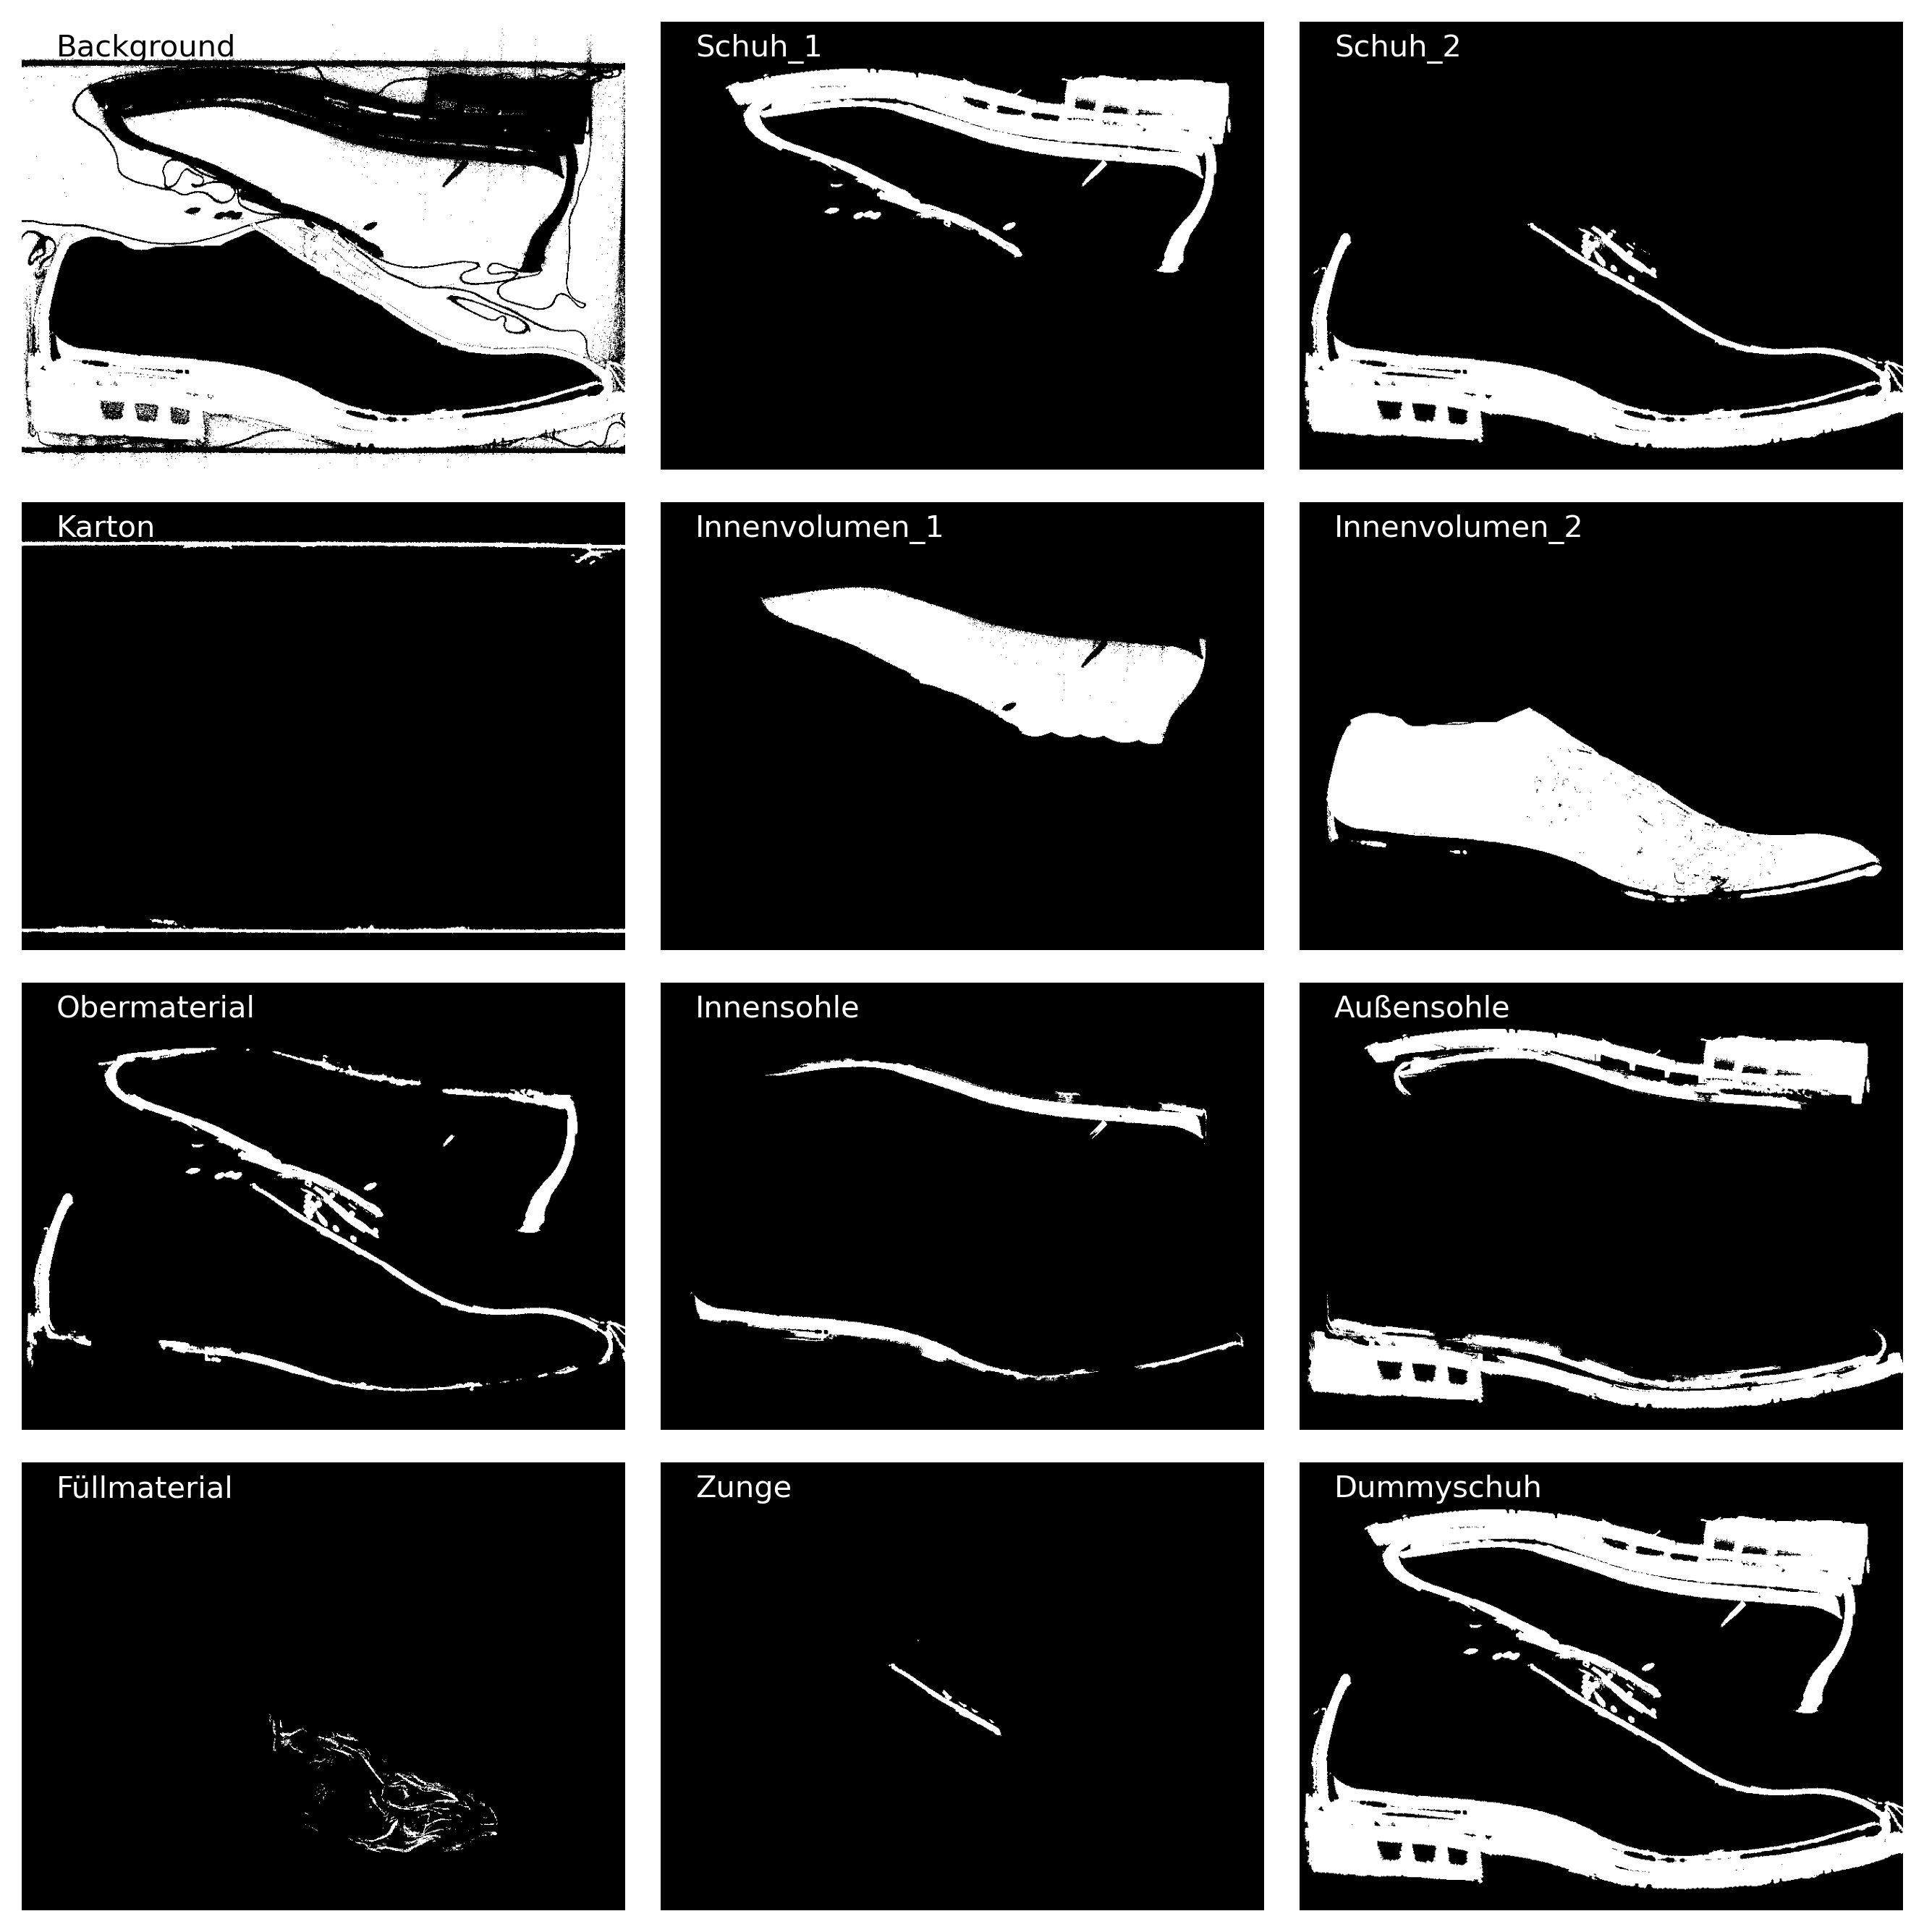

In [16]:
# extract only layer 335 and combine to one image
target_directory = "./images/masks_Bruschi_down2_2_2_side_2D_25_layers_5x5"

_Background = data_Background.get("voxels")[335]
_Schuh_1 = data_Schuh_1.get("voxels")[335]
_Schuh_2 = data_Schuh_2.get("voxels")[335]
_Karton = data_Karton.get("voxels")[335]
_Innenvolumen_1 = data_Innenvolumen_1.get("voxels")[335]
_Innenvolumen_2 = data_Innenvolumen_2.get("voxels")[335]
_Obermaterial = data_Obermaterial.get("voxels")[335]
_Innensohle = data_Innensohle.get("voxels")[335]
_Aussensohle = data_Aussensohle.get("voxels")[335]
_Fuellmaterial = data_Fuellmaterial.get("voxels")[335]
_Zunge = data_Zunge.get("voxels")[335]
_Dummyschuh = data_Dummyschuh.get("voxels")[335]

image = np.stack((_Background, _Schuh_1, _Schuh_2, _Karton, _Innenvolumen_1, _Innenvolumen_2, _Obermaterial, _Innensohle, _Aussensohle, _Fuellmaterial, _Zunge, _Dummyschuh), axis=2)

combinePictures(target_directory, "Layer_335", image.transpose(2,0,1))

## Extract image and masks for layer xyz of all shoes

In [17]:
def extractImageLayer(folderpath, filename, volume, layer):

    N = 1 # remove N pixels from the border

    folder_path = Path(folderpath)
    folder_path.mkdir(parents=True, exist_ok=True)

    vol = volume[layer]

    vol_values = np.unique(vol)
    vol_max = vol_values[-1] # higest value
    vol_min = vol_values[1] # second lowest ...

    if np.issubdtype(vol.dtype, np.integer):
        vol_max = vol.max()
        vol_min = vol.min()

    print(vol.shape, vol_max, vol_min, vol.max(), vol.min())

    # Remove N pixels from the border because some are black even when the image is very bright; otherwise normalization (min/max) give not so good results 
    #vol = vol[N:-N, N:-N]

    # Normalize the volume data to the range 0-255
    normalized_volume = (vol - vol_min) / (vol_max - vol_min + 1e-5) * 255
    normalized_volume = normalized_volume.astype(np.uint8)


    # Save the image using PIL
    image = Image.fromarray(normalized_volume)
    #image = image.convert("L")
    image.save(f"{folder_path.joinpath(filename)}_layer_{layer}.png")

In [18]:

target_directory = "./images/images_2D/images"
 
# Create a dictionary of files and corresponding layers (layer were selected by visual inspection of all files)
files_layers_dict = {"./Data/volumes/Adidas_Martin-weiss.rek": 287, "./Data/volumes/Adidas_Martin.rek": 494, 
                     "./Data/volumes/Bruschi_down2_2_2.rek": 217, "./Data/volumes/Camper_down2_2_2.rek": 141, 
                     "./Data/volumes/Citywalk-sit-taupe-34_down2_2_2.rek": 533, "./Data/volumes/Citywalk-sit-taupe-36_down2_2_2.rek": 535, 
                     "./Data/volumes/Citywalk-sit-taupe-39_down2_2_2.rek": 509, "./Data/volumes/Citywalk-sit-taupe-40_down2_2_2.rek": 489, 
                     "./Data/volumes/Citywalk-sit-taupe-42_down2_2_2.rek": 466, "./Data/volumes/Herrenschuh_43p5_down2_2_2.rek": 249, 
                     "./Data/volumes/Lidl_43_down2_2_2.rek": 205, "./Data/volumes/Lloyd_38_down2_2_2.rek": 249, 
                     "./Data/volumes/Lloyd_pink_down2_2_2.rek": 209, "./Data/volumes/Lloyd_weiss_down2_2_2.rek": 168, 
                     "./Data/volumes/McKinley_Anton_down2_2_2.rek": 535, "./Data/volumes/Mustang-Sch-Navy-Metalli-35_down2_2_2.rek": 466, 
                     "./Data/volumes/Mustang-Sch-Navy-Metalli-40_down2_2_2.rek": 466, "./Data/volumes/Mustang-Sch-Navy-Metalli_31_down2_2_2.rek": 443, 
                     "./Data/volumes/Mustang-Sch-Navy-Metalli_36_down2_2_2.rek": 443, "./Data/volumes/Mustang-Sch-Navy-Metalli_37_down2_2_2.rek": 484, 
                     "./Data/volumes/Pertolio-dunkelbraun_43_down2_2_2.rek": 402, "./Data/volumes/Petrolio-Sch-dunkelbraun_42_down2_2_2.rek": 322, 
                     "./Data/volumes/Petrolio-Sch-dunkelbraun_44_down2_2_2.rek": 363, "./Data/volumes/Petrolio-Sch-dunkelbraun_46_down2_2_2.rek": 523, 
                     "./Data/volumes/PetrolioSch-40-float_down2_2_2.rek": 230, "./Data/volumes/Puma_38_down2_2_2.rek": 202, 
                     "./Data/volumes/Puma_Silver_down2_2_2.rek": 216, "./Data/volumes/Puma_White_down2_2_2.rek": 216, 
                     "./Data/volumes/Schuh_Martin_down2_2_2.rek": 453, "./Data/volumes/Shoepassion_40_down2_2_2.rek": 243, 
                     "./Data/volumes/Shoepassion_45_down2_2_2.rek": 176, "./Data/volumes/Shoepassion_Herren_40_down2_2_2.rek": 74, 
                     "./Data/volumes/Sneaker_Dana_Nike.rek": 222, "./Data/volumes/Sneaker_Dana_Puma_Flyer.rek": 204, 
                     "./Data/volumes/Stiefel-XY_40_down2_2_2.rek": 483, "./Data/volumes/Tamaris-Pump-Schwarz-38_down2_2_2.rek": 362, 
                     "./Data/volumes/Tamaris-Pump-schwarz_36_down2_2_2.rek": 402, "./Data/volumes/Tamaris-Pump-Schwarz_39_down2_2_2.rek": 364, 
                     "./Data/volumes/Tamaris-Pump-schwarz_40_down2_2_2.rek": 443, "./Data/volumes/Tamaris-Pump-schwarz_42_down2_2_2.rek": 404}

# files_layers_dict = {"./Data/volumes/Stiefel-XY_40_down2_2_2.rek": 483}

# Loop through the dictionary
for file, layer in files_layers_dict.items():
    # Get the file name without extension
    file_path  = Path(file)
    filename =  file_path.stem
    print(filename)  

    header, volume = rek2py(filepath=file, switch_order=True)

    if Path(file) in rotate_shoes:
        orientation = (1,2,0)
    else:
        orientation = (2,1,0)

    extractImageLayer(target_directory, filename, volume.transpose(orientation), layer) # these shoes need different orientation / transpose

Adidas_Martin-weiss
(988, 993) 21654 0 21654 0
Adidas_Martin
(990, 993) 11182 0 11182 0
Bruschi_down2_2_2
(650, 876) 0.18480475 -0.020158432 0.18480475 -0.02058652
Camper_down2_2_2
(675, 880) 0.16178569 -0.034992244 0.16178569 -0.036047503
Citywalk-sit-taupe-34_down2_2_2
(1068, 1042) 1.5517839 -0.106839865 1.5517839 -0.3496368
Citywalk-sit-taupe-36_down2_2_2
(1068, 1056) 0.17464054 -0.0814966 0.17464054 -0.57709885
Citywalk-sit-taupe-39_down2_2_2
(1019, 1043) 1.2662323 -0.10876471 1.2662323 -0.675482
Citywalk-sit-taupe-40_down2_2_2
(1068, 1042) 1.5581031 -0.12678176 1.5581031 -0.3851598
Citywalk-sit-taupe-42_down2_2_2
(1018, 1042) 0.23042181 -0.055930853 0.23042181 -0.36646953
Herrenschuh_43p5_down2_2_2
(700, 888) 1.6930857 -0.0536666 1.6930857 -0.057647027
Lidl_43_down2_2_2
(675, 880) 0.18167116 -0.024372179 0.18167116 -0.026839636
Lloyd_38_down2_2_2
(675, 876) 0.196556 -0.05015573 0.196556 -0.051490787
Lloyd_pink_down2_2_2
(650, 876) 0.2262851 -0.03744274 0.2262851 -0.037755445
Lloyd

/tmp/ipykernel_2020/527112007.py:24: RuntimeWarning: invalid value encountered in subtract
  normalized_volume = (vol - vol_min) / (vol_max - vol_min + 1e-5) * 255
/tmp/ipykernel_2020/527112007.py:25: RuntimeWarning: invalid value encountered in cast
  normalized_volume = normalized_volume.astype(np.uint8)


In [19]:
masks_layers_dict = {"./Data/annotations/Adidas_Martin-weiss.seg.nrrd": 287,  "./Data/annotations/Adidas_Martin.seg.nrrd": 494,
                     "./Data/annotations/Bruschi_down2_2_2.seg.nrrd": 217, "./Data/annotations/Camper_down2_2_2.seg.nrrd": 141,
                     "./Data/annotations/Citywalk 34.seg.nrrd": 533, "./Data/annotations/Citywalk 36.seg.nrrd": 535, 
                     "./Data/annotations/Citywalk 39.seg.nrrd": 509, "./Data/annotations/Citywalk 40.seg.nrrd": 489, 
                     "./Data/annotations/Citywalk 42.seg.nrrd": 466, "./Data/annotations/Herrenschuh_43p5_down2_2_2.seg.nrrd": 249,
                     "./Data/annotations/Lidl_43_down2_2_2.seg.nrrd": 205, "./Data/annotations/Lloyd_38_down2_2_2.seg.nrrd": 249, 
                     "./Data/annotations/Lloyd_pink_down2_2_2.seg.nrrd": 209, "./Data/annotations/Lloyd_weiss_down2_2_2.seg.nrrd": 168,
                     "./Data/annotations/McKinley_Anton.seg.nrrd": 535, "./Data/annotations/Mustang 35.seg.nrrd": 466,
                     "./Data/annotations/Mustang 40.seg.nrrd": 466, "./Data/annotations/Mustang 31.seg.nrrd": 443,
                     "./Data/annotations/Mustang 36.seg.nrrd": 443, "./Data/annotations/Mustang 37.seg.nrrd": 484,
                     "./Data/annotations/Petrolio 43.seg.nrrd": 402, "./Data/annotations/Petrolio 42.seg.nrrd": 322,
                     "./Data/annotations/Petrolio 44.seg.nrrd": 363, "./Data/annotations/Petrolio 46.seg.nrrd": 523,
                     "./Data/annotations/Petrolio 40.seg.nrrd": 230, "./Data/annotations/Puma_38_down2_2_2.seg.nrrd": 202,
                     "./Data/annotations/Puma_Silver_down2_2_2.seg.nrrd": 216, "./Data/annotations/Puma_White_down2_2_2.seg.nrrd": 216,
                     "./Data/annotations/Schuh_Martin_down2_2_2.seg.nrrd": 453, "./Data/annotations/Shoepassion_40_down2_2_2.seg.nrrd": 243,
                     "./Data/annotations/Shoepassion_45_down2_2_2.seg.nrrd": 176, "./Data/annotations/Shoepassion_Herren_40_down2_2_2.seg.nrrd": 74,
                     "./Data/annotations/Sneaker_Dana_Nike.seg.nrrd": 222, "./Data/annotations/Sneaker_Dana_Puma_Flyer.seg.nrrd": 204,
                     "./Data/annotations/StiefelXY.seg.nrrd": 483, "./Data/annotations/TamarisPump 38.seg.nrrd": 362,
                     "./Data/annotations/TamarisPump 36.seg.nrrd": 402, "./Data/annotations/TamarisPump 39.seg.nrrd": 364,
                     "./Data/annotations/TamarisPump 40.seg.nrrd": 443, "./Data/annotations/TamarisPump 42.seg.nrrd": 404}

rotate_shoes = ["./Data/annotations/Adidas_Martin.seg.nrrd","./Data/annotations/Citywalk 34.seg.nrrd", 
                "./Data/annotations/Citywalk 36.seg.nrrd", "./Data/annotations/Citywalk 40.seg.nrrd", 
                "./Data/annotations/Schuh_Martin_down2_2_2.seg.nrrd", "./Data/annotations/Sneaker_Dana_Nike.seg.nrrd", 
                "./Data/annotations/Sneaker_Dana_Puma_Flyer.seg.nrrd"]

# masks_layers_dict = {"./Data/annotations/StiefelXY.seg.nrrd": 483}

In [20]:
def extractMaskLayer(folderpath, filename, mask, volume, layer):

    N = 1 # remove N pixels from the border

    folder_path = Path(folderpath)
    folder_path.mkdir(parents=True, exist_ok=True)

    vol = volume[layer]

    # Remove N pixels from the border because some are black even when the image is very bright; otherwise normalization (min/max) give not so good results  (unfortunately, not all images can be corrected ...)
    #print("shape before: ", vol.shape)
    #vol = vol[N:-N, N:-N]
    #print("shape after: ", vol.shape)

    # Normalize the volume data to the range 0-255
    normalized_volume = (vol - vol.min()) / (vol.max() - vol.min() + 1e-5) * 255
    normalized_volume = normalized_volume.astype(np.uint8)    

    # Save the image using PIL
    image = Image.fromarray(normalized_volume)
    image.save(f"{folder_path.joinpath(filename)}_{mask}_layer_{layer}.png")

In [21]:
'''
    execute 
    
    the block with the libraries, 
    the block with masks_layers_dict  (two blocks above)
    
    if stopped
'''
target_directory = "./images/images_2D/masks"


# Loop through the dictionary
for file, layer in masks_layers_dict.items():     
    # Get the file name without extension
    file_path  = Path(file)
    
    if file_path.suffix:  # Check again if there's at least one suffix
        filename =  file_path.stem

        if file_path.suffix:  # Check again if there's at least one suffix
            filename = filename.rsplit('.', 1)[0]  # Remove the last part after the last '.'
    print(filename)  

    segmentation_info = slicerio.read_segmentation(file)
    segment_names = slicerio.segment_names(segmentation_info) # Get semgnet_names where 3D Slicer

    dict_label = {}
    segment_names_to_labels = []
    for j, sn in enumerate(segment_names):
        segment_names_to_labels.append((sn, j+1)) 
        if not segment_names_to_labels:
            continue
    
    #print(segment_names_to_labels)


    # Numbering according to Segmented labels of 3D Slicer
    data_Obermaterial   = slicerio.extract_segments(segmentation_info, [[item for item in segment_names_to_labels if item[0] == "Obermaterial"][0]])
    data_Innensohle     = slicerio.extract_segments(segmentation_info, [[item for item in segment_names_to_labels if item[0] == "Innensohle"][0]])
    data_Aussensohle    = slicerio.extract_segments(segmentation_info, [[item for item in segment_names_to_labels if item[0] == "Auensohle"][0]])
    data_Fuellmaterial  = slicerio.extract_segments(segmentation_info, [[item for item in segment_names_to_labels if item[0] == "Fllmaterial"][0]])
    data_Zunge          = slicerio.extract_segments(segmentation_info, [[item for item in segment_names_to_labels if item[0] == "Zunge"][0]])
    data_Karton         = slicerio.extract_segments(segmentation_info, [[item for item in segment_names_to_labels if item[0] == "Karton"][0]])

    if file in rotate_shoes:
        orientation = (1,0,2) # these shoes need different orientation / transpose
    else:
        orientation = (0,1,2) # normal orientation for all shoes
    
    extractMaskLayer(target_directory, filename, "Obermaterial", data_Obermaterial.get("voxels").transpose(orientation), layer)
    extractMaskLayer(target_directory, filename, "Innensohle", data_Innensohle.get("voxels").transpose(orientation), layer)
    extractMaskLayer(target_directory, filename, "Außensohle", data_Aussensohle.get("voxels").transpose(orientation), layer)
    extractMaskLayer(target_directory, filename, "Füllmaterial", data_Fuellmaterial.get("voxels").transpose(orientation), layer)
    extractMaskLayer(target_directory, filename, "Zunge", data_Zunge.get("voxels").transpose(orientation), layer)
    extractMaskLayer(target_directory, filename, "Karton", data_Karton.get("voxels").transpose(orientation), layer)

Adidas_Martin-weiss
Adidas_Martin
Bruschi_down2_2_2
Camper_down2_2_2
Citywalk 34
Citywalk 36
Citywalk 39
Citywalk 40
Citywalk 42
Herrenschuh_43p5_down2_2_2
Lidl_43_down2_2_2
Lloyd_38_down2_2_2
Lloyd_pink_down2_2_2
Lloyd_weiss_down2_2_2
McKinley_Anton
Mustang 35
Mustang 40
Mustang 31
Mustang 36
Mustang 37
Petrolio 43
Petrolio 42
Petrolio 44
Petrolio 46
Petrolio 40
Puma_38_down2_2_2
Puma_Silver_down2_2_2
Puma_White_down2_2_2
Schuh_Martin_down2_2_2
Shoepassion_40_down2_2_2
Shoepassion_45_down2_2_2
Shoepassion_Herren_40_down2_2_2
Sneaker_Dana_Nike
Sneaker_Dana_Puma_Flyer
StiefelXY
TamarisPump 38
TamarisPump 36
TamarisPump 39
TamarisPump 40
TamarisPump 42
